# Visual Inspection

# 1. Pre-Processing of Data
- to ensure the features work as intended


## 1.1 import the data

In [1]:
import df_manipulation_functions as dfmf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read in the the flow and temp data
flow_temp_df = dfmf.create_flow_temp_df("Data/Temp/*.txt","Data/Flow/*.txt") 
#save the dataframe as pickle file
flow_temp_df.to_pickle("Data/flow_temp_df.pkl")
#read in the pickle file
flow_temp_df = pd.read_pickle("Data/flow_temp_df.pkl")
flow_temp_df.head()

Zeitstempel   Stationsname  Stationsnummer  Flow_Wert  Temp_Wert  \
0  1980-01-01 00:00:00  Porte du Scex            2009     82.533        3.7   
1  1980-01-02 00:00:00  Porte du Scex            2009    117.734        3.3   
2  1980-01-03 00:00:00  Porte du Scex            2009    144.834        3.4   
3  1980-01-04 00:00:00  Porte du Scex            2009    148.472        3.4   
4  1980-01-05 00:00:00  Porte du Scex            2009    112.333        3.4   

  Gewässer  
0    Rhône  
1    Rhône  
2    Rhône  
3    Rhône  
4    Rhône

## 1.2 Visual inspection of flow data

- plot two example stations to have a close look at two different curves
- plot all the stations in one plot to see the general trend of the data
- to see if there are any outliers
- to see if there are any stations that are not working properly

### 1.2.1 Plot one station 
- over different time periods (e.g three years, one year)
- make use of averaging over time 
- use average window function to get a smoother curve

In [3]:
# chose station 2019 and get the station data
example_station_number = 2019
Wert = 'Flow_Wert'
example_station_df = dfmf.get_station_df(example_station_number, flow_temp_df)
example_station_df.head()

Stationsnummer          Zeitstempel  Flow_Wert  Temp_Wert
44921            2019  1980-01-01 00:00:00     14.656        3.9
44922            2019  1980-01-02 00:00:00     22.752        3.4
44923            2019  1980-01-03 00:00:00     23.579        3.3
44924            2019  1980-01-04 00:00:00     25.064        3.4
44925            2019  1980-01-05 00:00:00     17.645        4.1

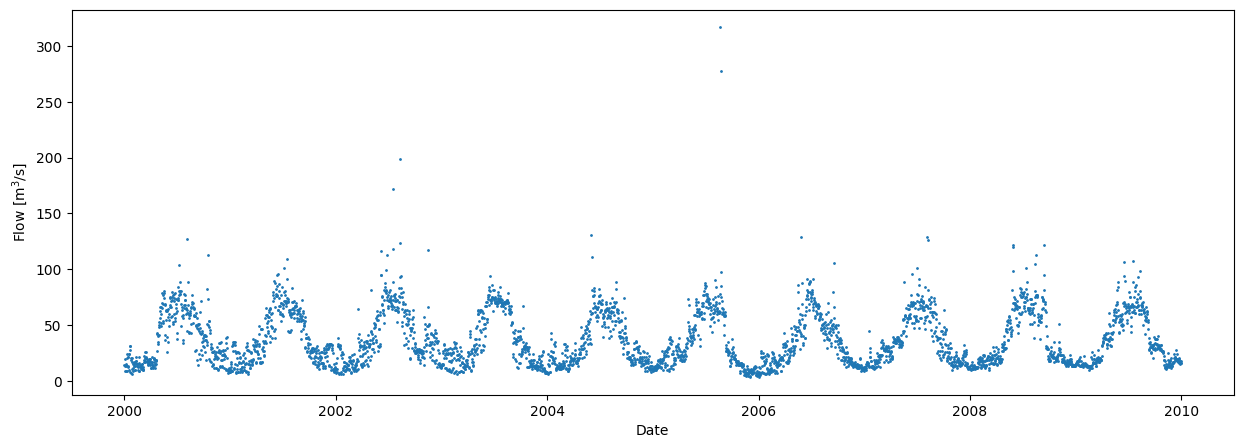

In [4]:
# get three years time period
example_station_3years_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2010-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=1)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
#plt.title(station_name + " " + str(example_station_number))

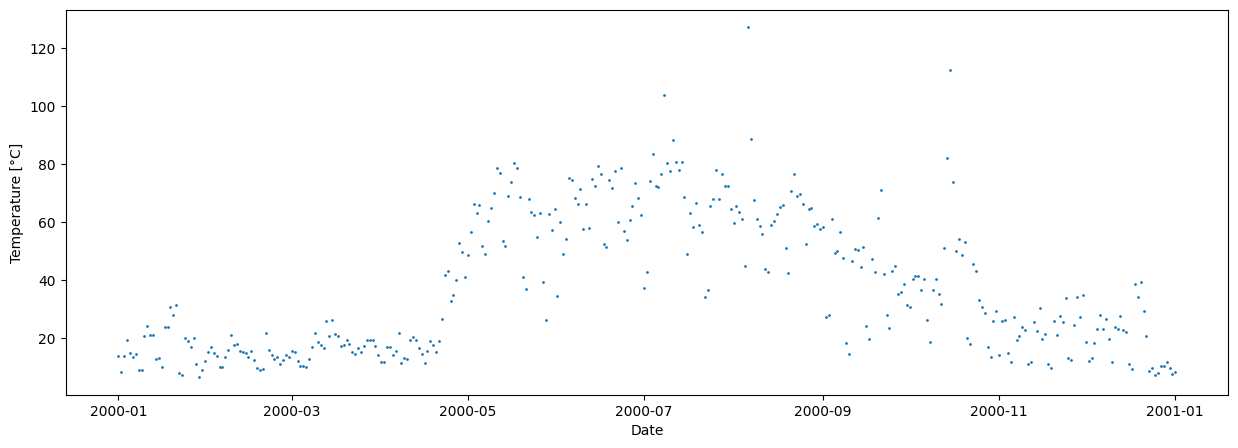

In [5]:

#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number, '2000-01-01', '2001-01-01', flow_temp_df)

#plot the station data over one year
plt.figure(figsize=(15,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=1)
plt.xlabel('Date')
if Wert == 'Temp_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:  
    plt.ylabel('Temperature [°C]')

### Results
- The data is noisy due to the interval of the measurements
- we do averageing by day over the 40 years of data to get a clearer curve


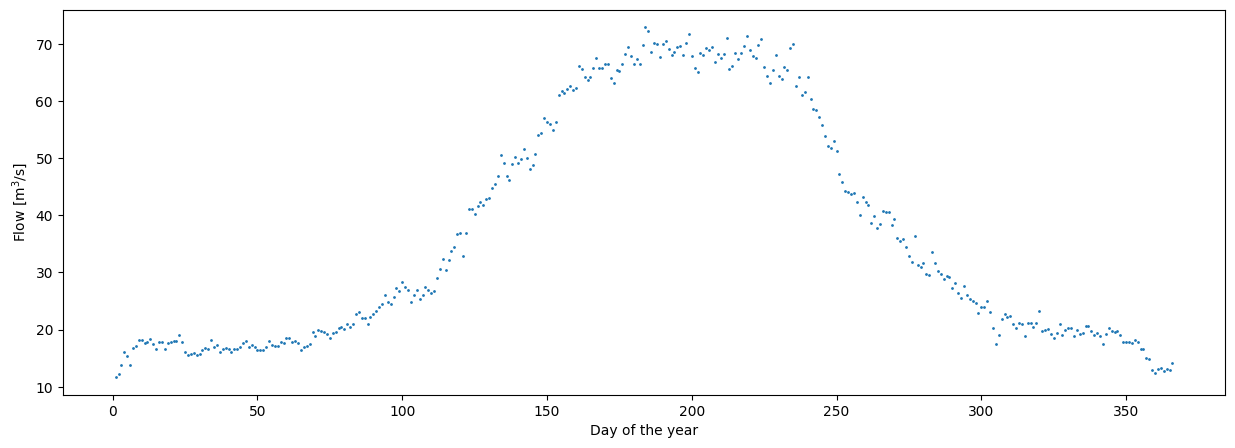

In [6]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(15,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=1)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

### Results
- The curve looks better but still a bit noisy


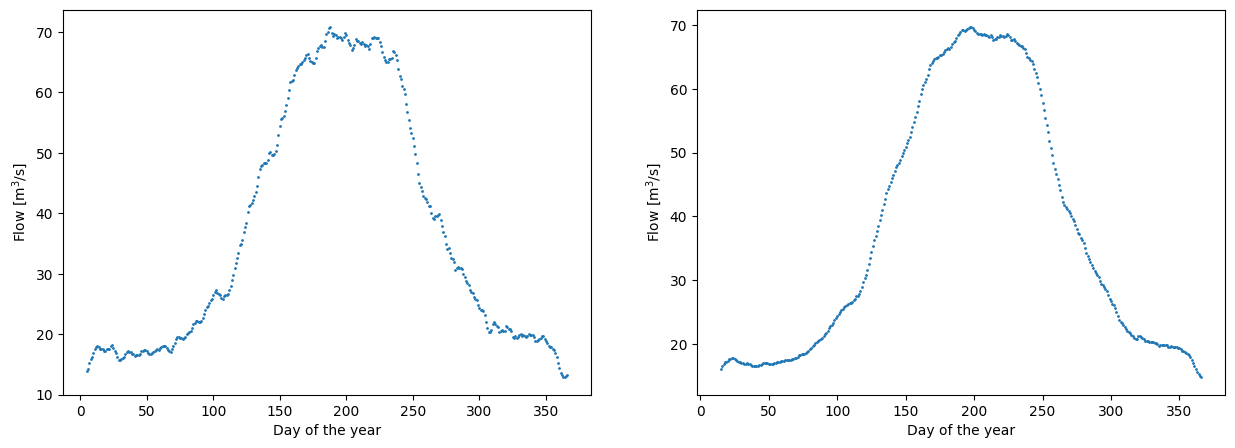

In [7]:
# get running mean of 5 days
window_length_long = 15
window_length_short = 5

station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=1)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s = 1)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')

ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')

## Results
- The curve loooks like a continuing function and the now calculated features might give reasonable values


## 1.2.2 Non Periodic station 
- there are some stations whick lack the clear periodicity of the given example 


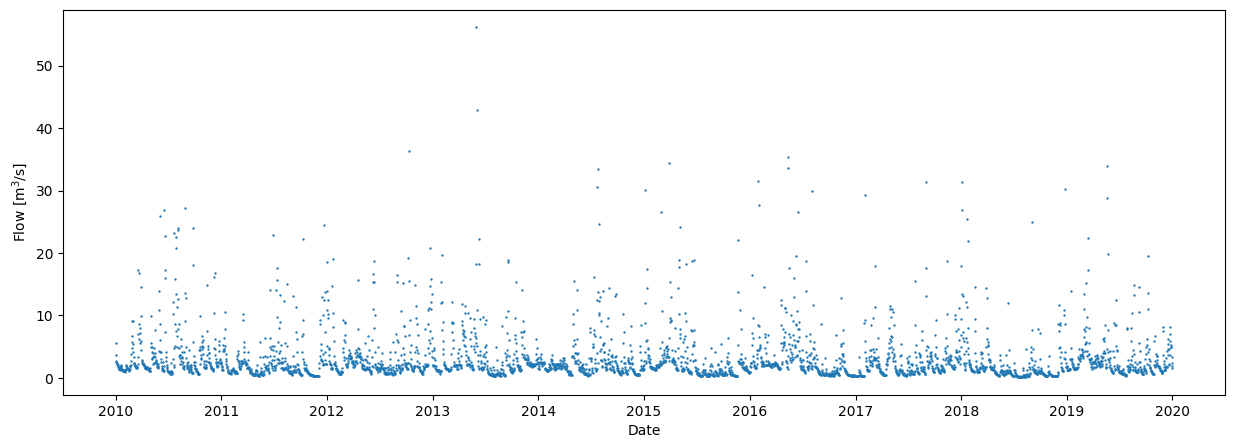

In [8]:
example_station_number2 = 2374
example_station_3years_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2020-01-01', flow_temp_df)

#plot the station data
plt.figure(figsize=(15,5))
plt.scatter(example_station_3years_df.index, example_station_3years_df[Wert], label=Wert, s=0.5)
station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == example_station_number2]['Stationsname'].unique()[0]
plt.xlabel('Date')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]') 
# plt.title(station_name + " " + str(example_station_number2))

Text(0, 0.5, 'Flow [m$^3$/s]')

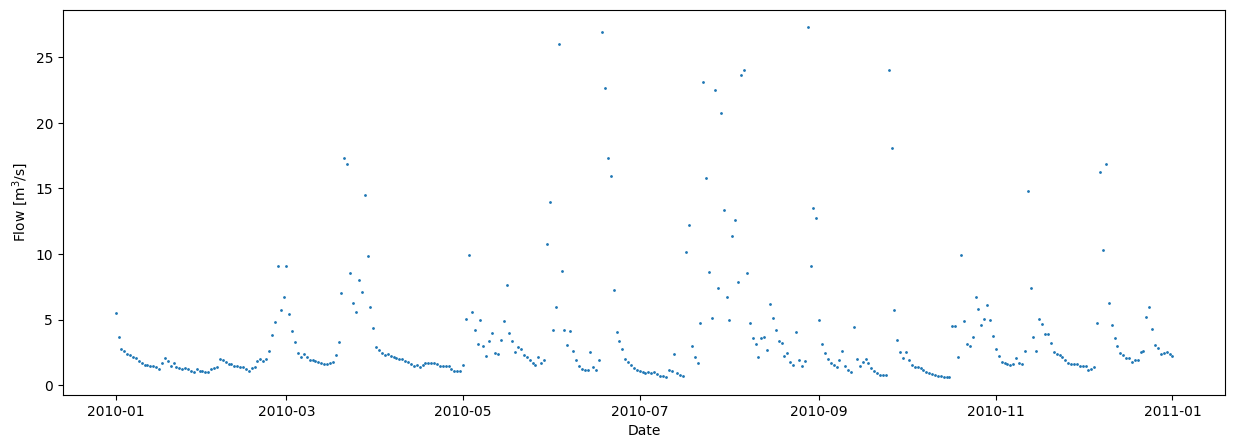

In [9]:
#get one year time period
example_station_1year_df = dfmf.get_time_period(example_station_number2, '2010-01-01', '2011-01-01', flow_temp_df)
#plot the station data over one year
plt.figure(figsize=(15,5))
plt.scatter(example_station_1year_df.index, example_station_1year_df[Wert], label=Wert, s=1)
plt.xlabel('Date')
plt.ylabel('Flow [m$^3$/s]')

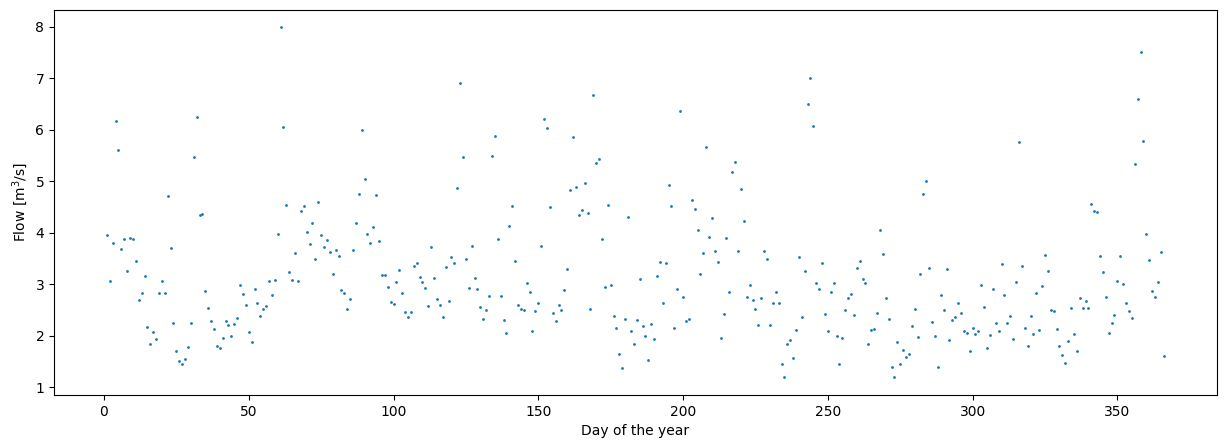

In [10]:
station_daily_averaged_df = dfmf.get_daily_averaged_df(example_station_number2, flow_temp_df)
station_daily_averaged_df.head()

#plot the daily averaged data
plt.figure(figsize=(15,5))
plt.scatter(station_daily_averaged_df.index, station_daily_averaged_df[Wert], label=Wert, s=1)
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')



# Results
- for this station there is no clear periodicity visible 
- it will be difficult to analyze this data with the same features as the other ones
- maybe there needs to be a feature vor periodicity (similarity by year)

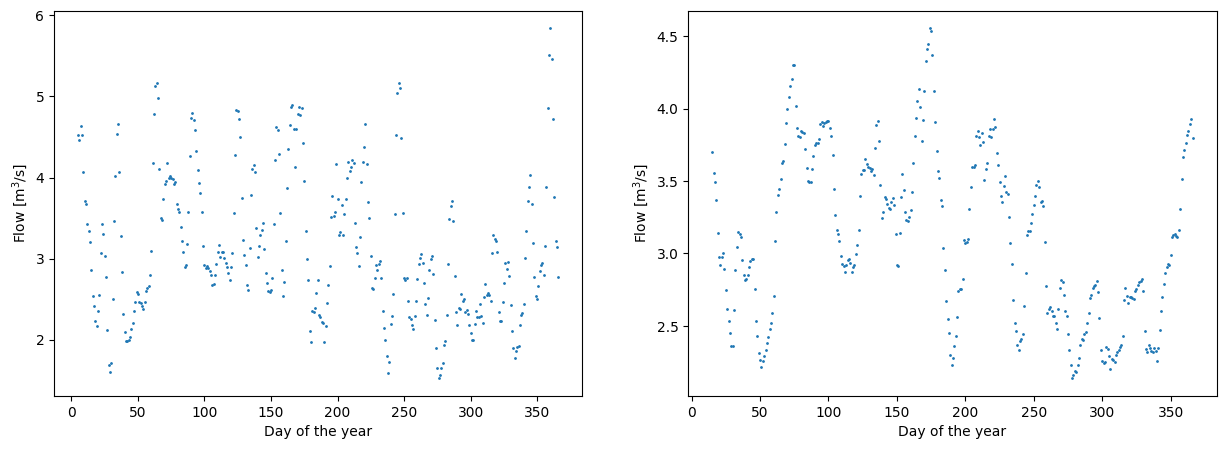

In [11]:
# get running mean of 5 days
window_length_long = 15
window_length_short = 5


station_daily_averaged_5days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_short, flow_temp_df, Wert)
station_daily_averaged_15days_mean_df = dfmf.get_running_mean_df(example_station_number2, window_length_long, flow_temp_df, Wert)

#plot the daily averaged data for both window lengths in plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(station_daily_averaged_5days_mean_df.index, station_daily_averaged_5days_mean_df[Wert], label=Wert, s=1)
ax2.scatter(station_daily_averaged_15days_mean_df.index, station_daily_averaged_15days_mean_df[Wert], label=Wert, s=1)
ax1.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax1.set_ylabel('Flow [m$^3$/s]')
else:
    ax1.set_ylabel('Temperature [°C]')
ax2.set_xlabel('Day of the year')
if Wert == 'Flow_Wert':
    ax2.set_ylabel('Flow [m$^3$/s]')
else:
    ax2.set_ylabel('Temperature [°C]')



## Results
- the curve looks still very noisy and it is difficult to say wether this actually resembles some behaviour

# 2. Analysis of all curves and deduction of features


## 2.1 Plot all Stations

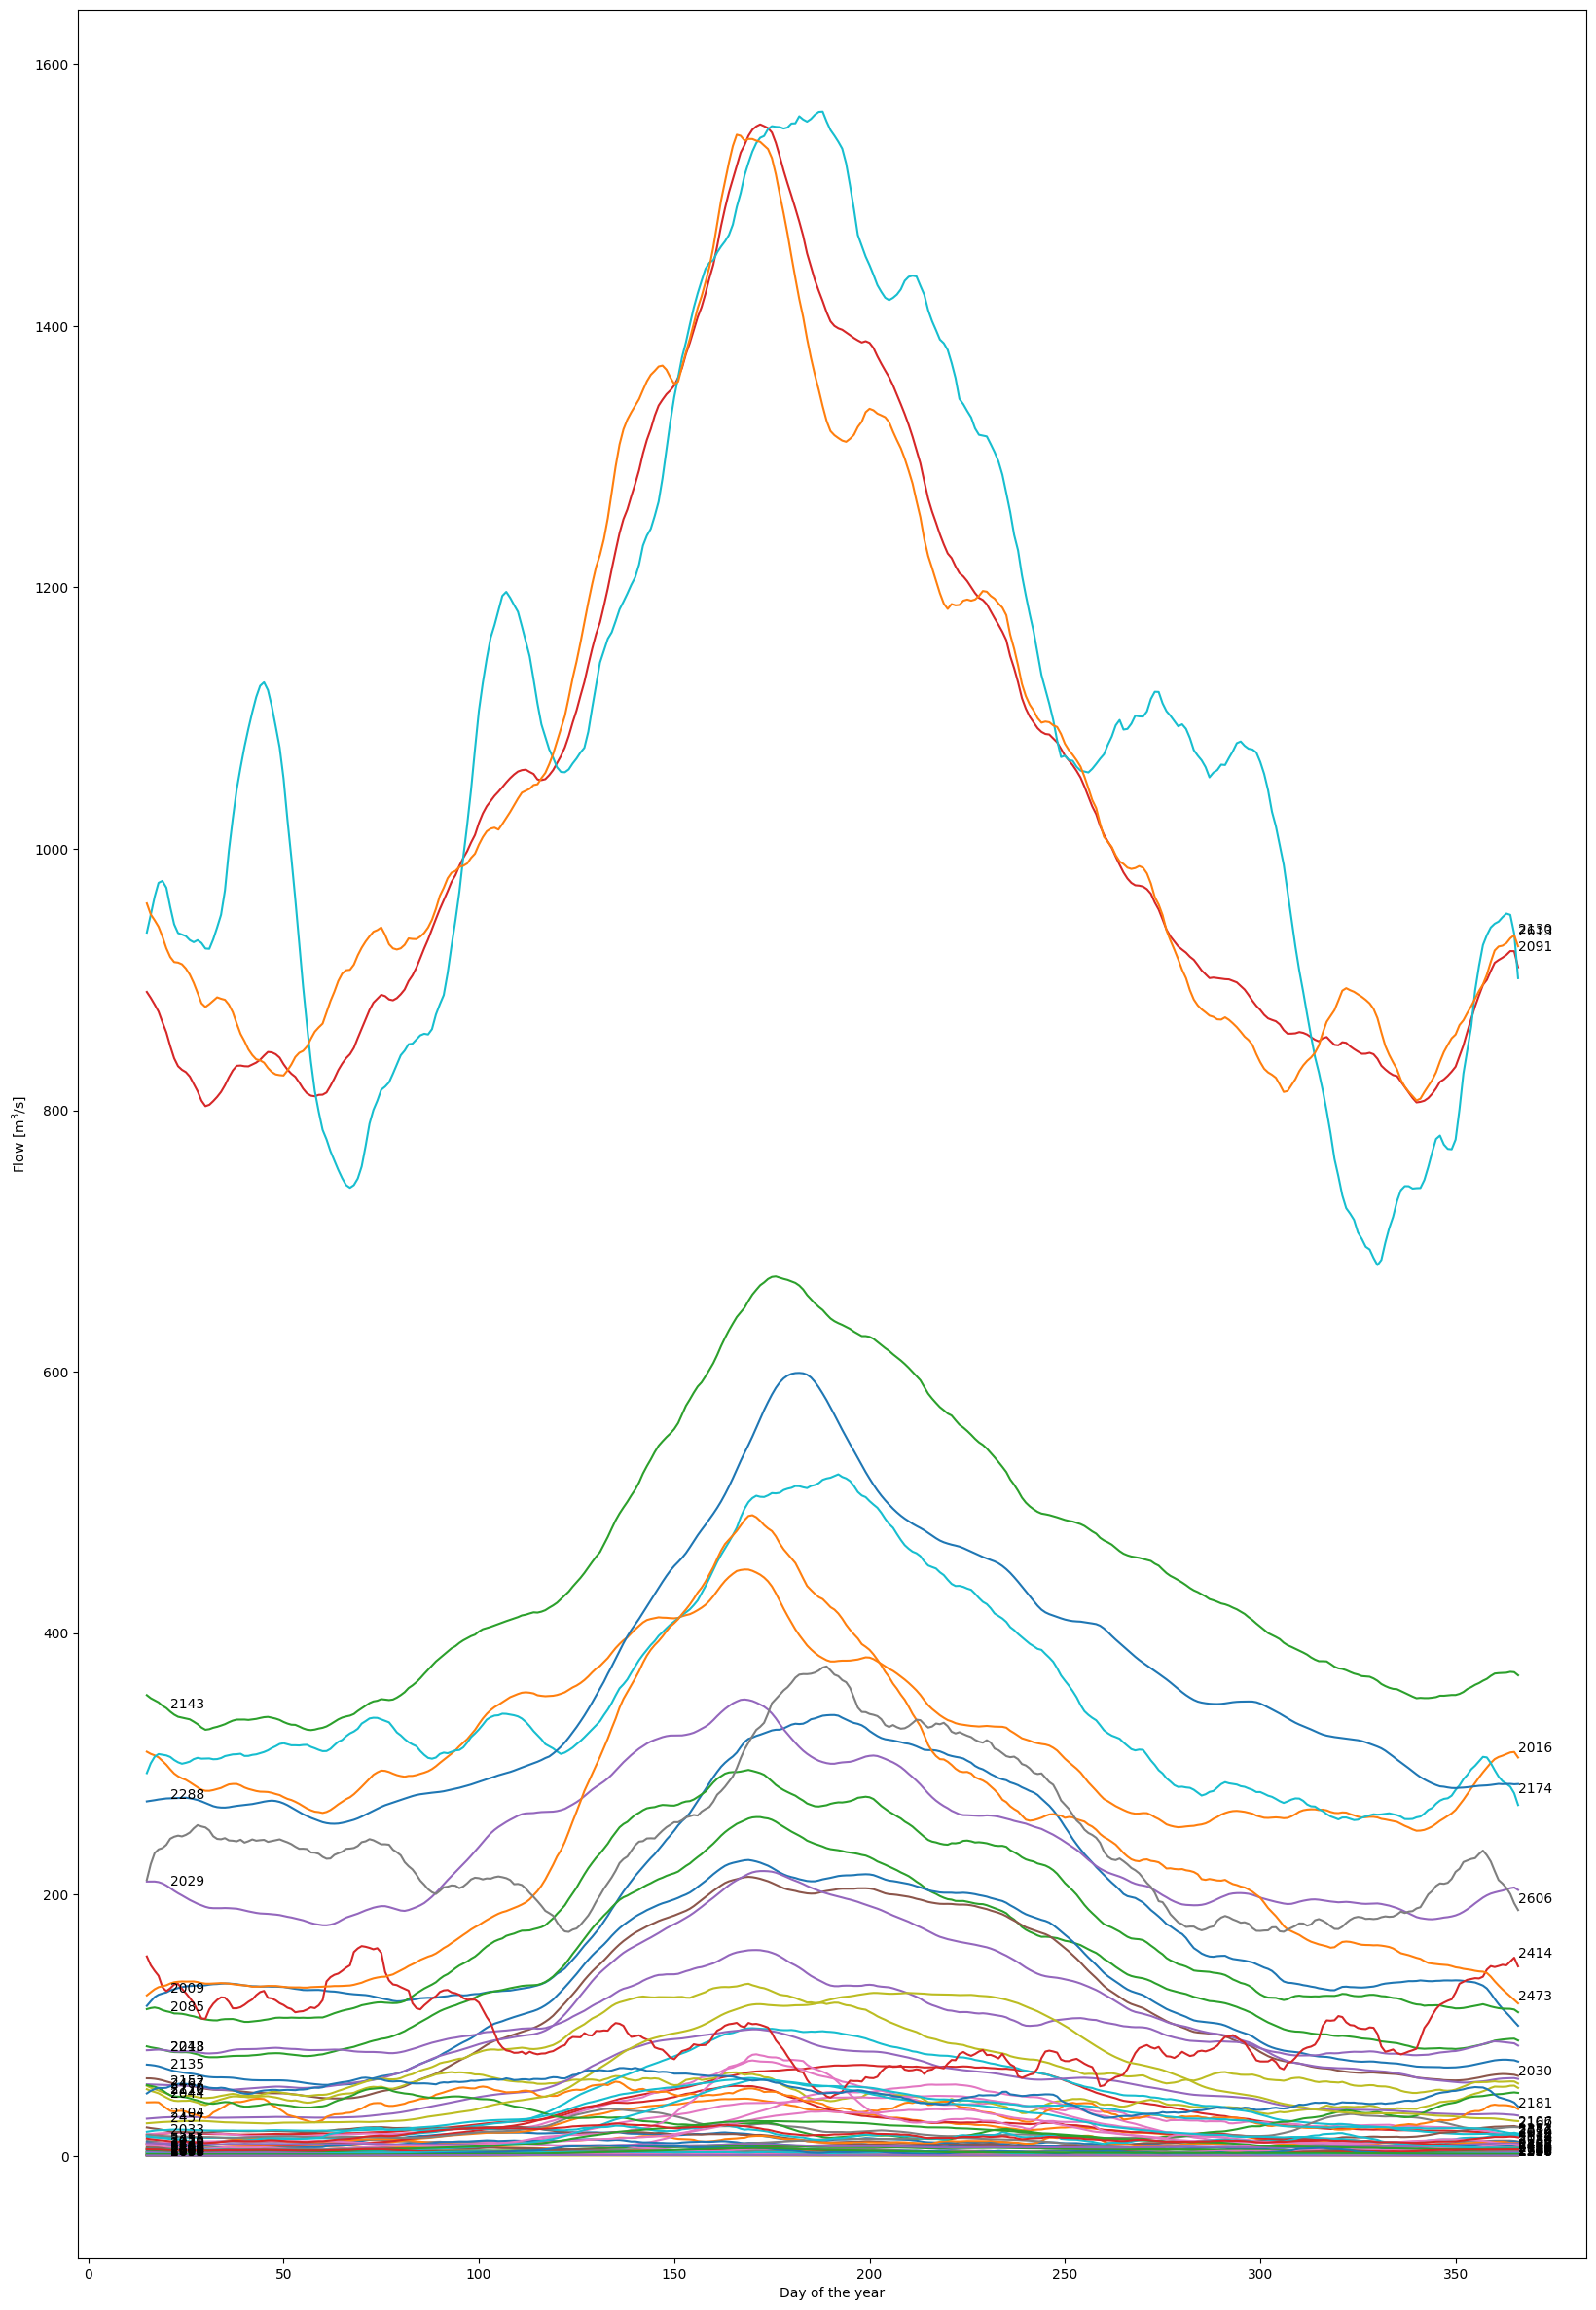

In [12]:
# plot all window function data of each station in one plot
window_length_long = 15

i = 20

plt.figure(figsize=(20,30))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df,Wert)
    plt.plot(station_df.index, station_df[Wert], label=station_number)
    
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')

    

# plt.figure(figsize=(20,50))
# for station_number in flow_temp_df['Stationsnummer'].unique():
#     station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, 'Temp_Wert')
#     plt.scatter(station_df.index, station_df['Temp_Wert'], label=station_number)

# #limit plot to positive values
# plt.ylim(0, 30)
# plt.show()



## Result 
- The data with a larger flow mean all look like curves of clear periodicity 
- for some with less flow the curve looks way more noisy 
- for the curves below 100 cubic in this plot nothing is visible 


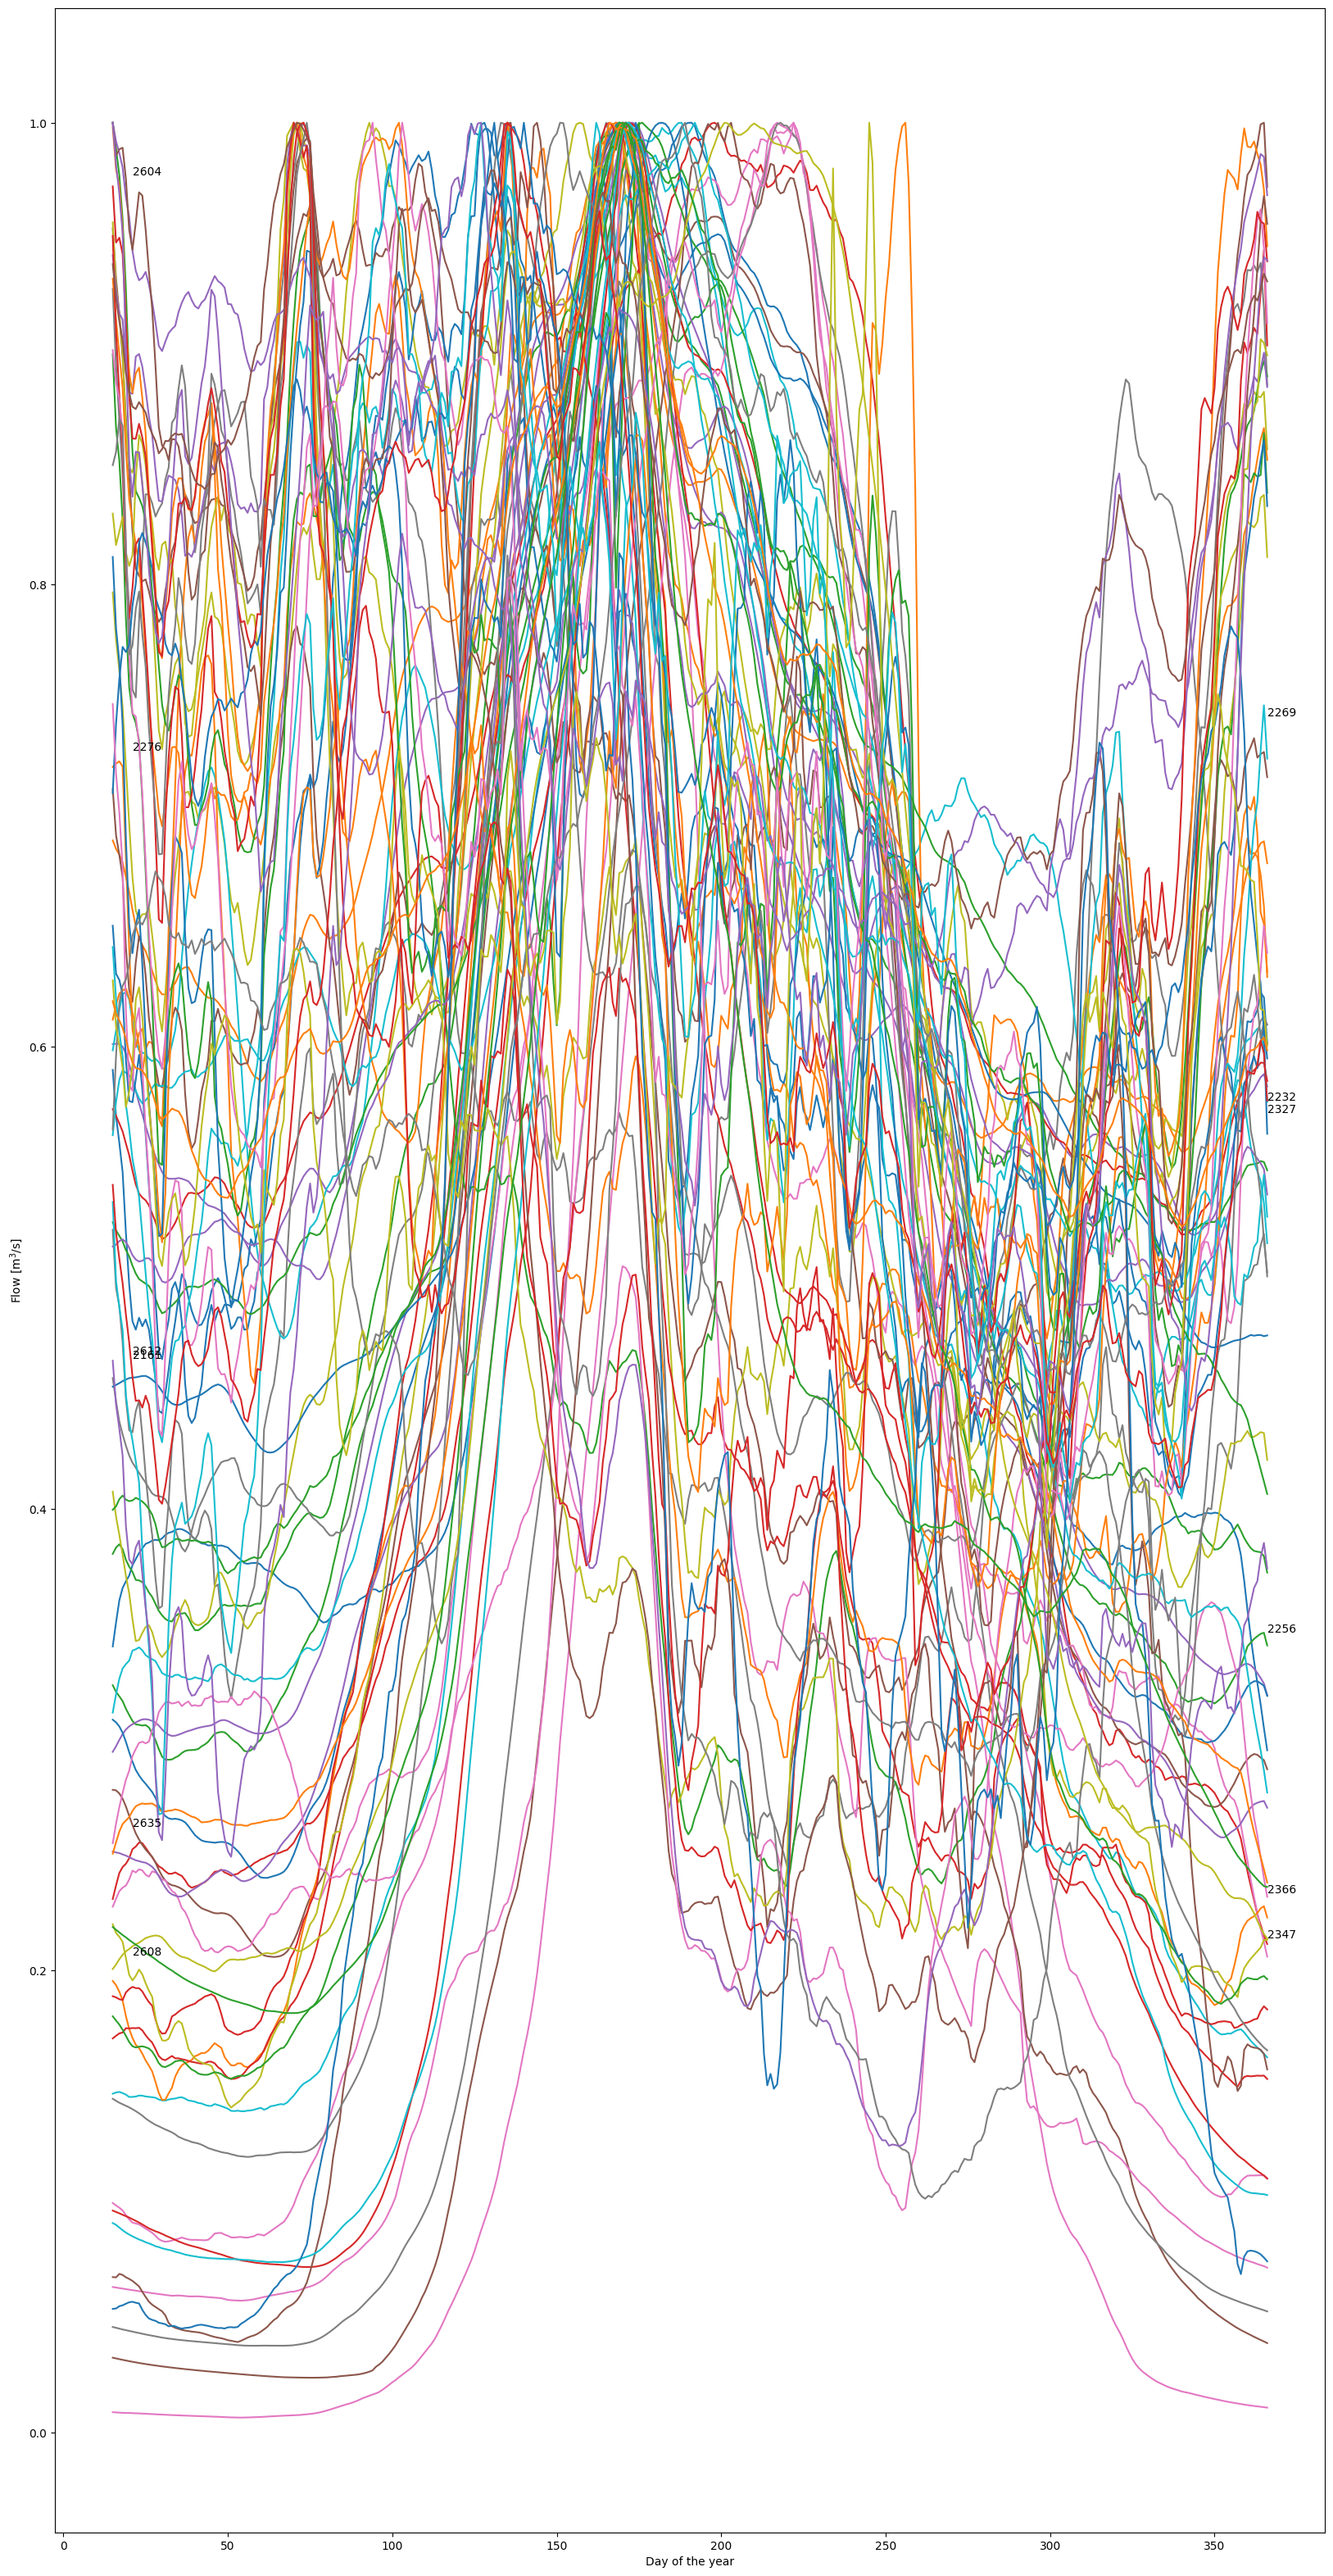

In [13]:
# plot all window function data of each station in one plot
import numpy as np
window_length_long = 15
i = 20
#plot the data normalized
plt.figure(figsize=(20,40))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.plot(station_df.index, station_df[Wert] / np.max(station_df[Wert]), label=station_number)
    plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    if(i == 20):
        i = 365
    else:
        i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
plt.show()

# plt.figure(figsize=(20,50))
# for station_number in flow_temp_df['Stationsnummer'].unique():
#     station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, 'Temp_Wert')
#     plt.scatter(station_df.index, station_df['Temp_Wert'], label=station_number)

# #limit plot to positive values
# plt.ylim(0, 30)
# plt.show()



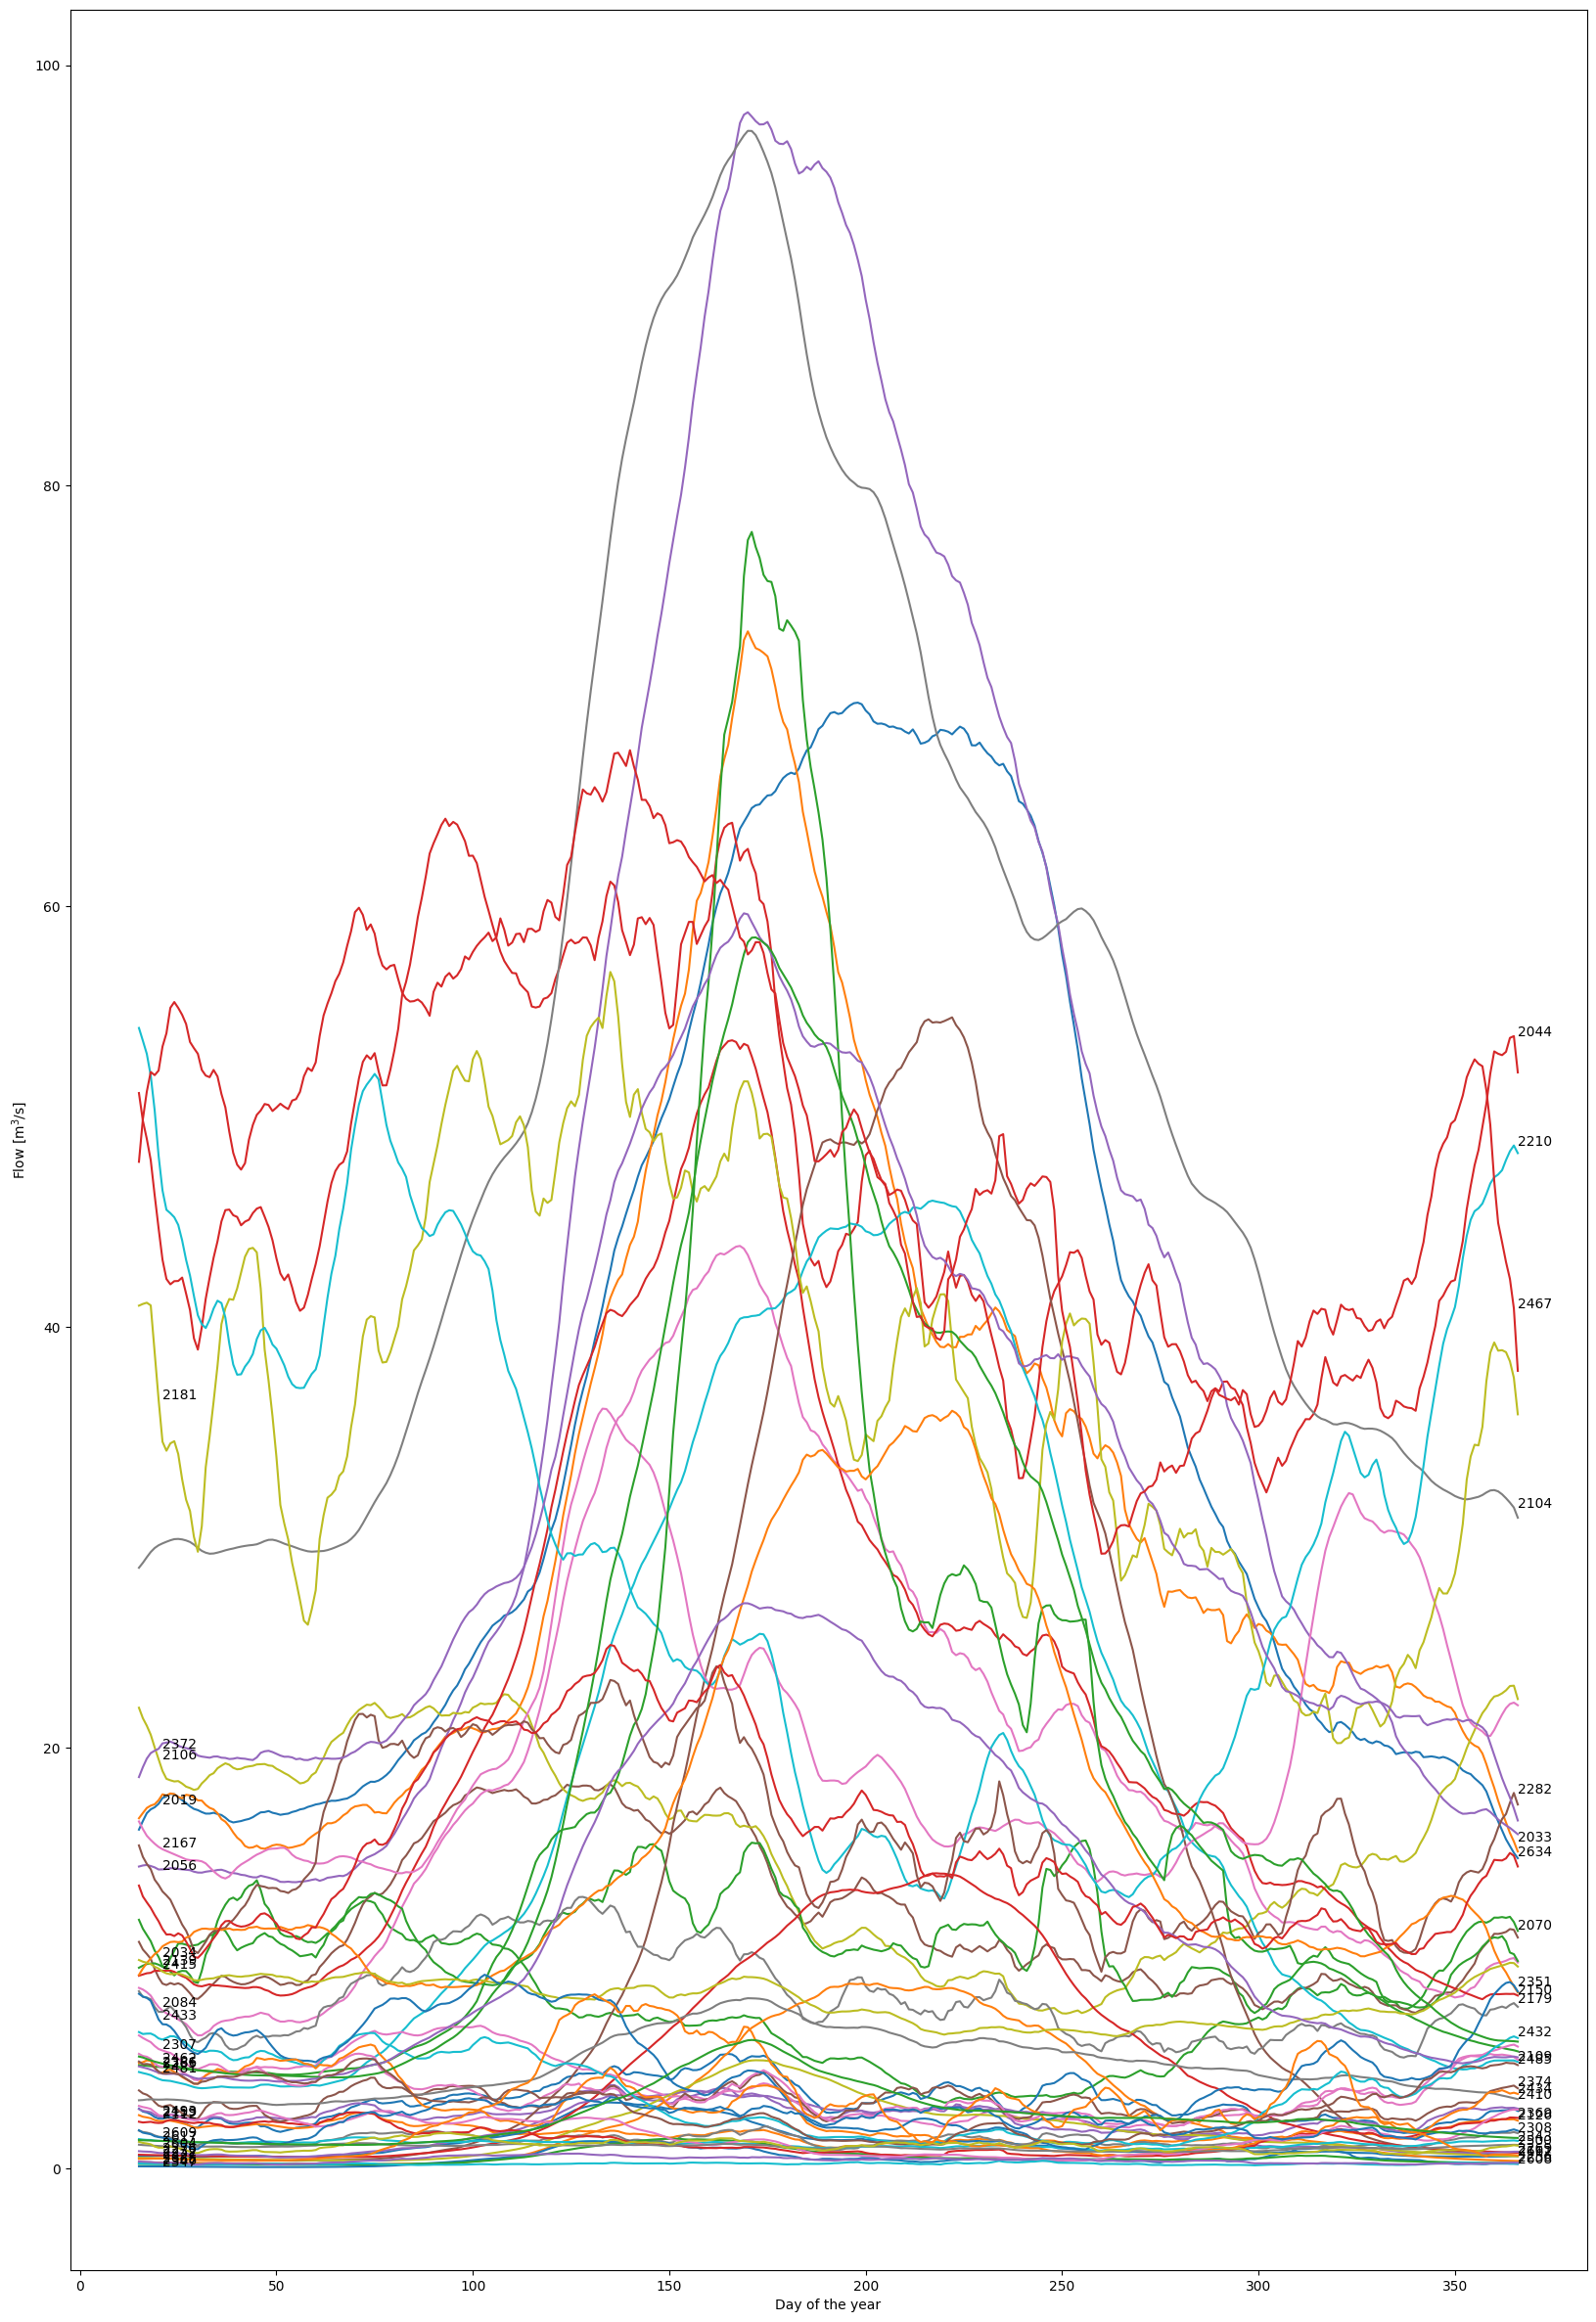

In [14]:
# plot the flow data of all the stations for max flow below 100 
window_length_long = 15
i = 20
plt.figure(figsize=(20,30))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    if(station_df[Wert].max() < 100):
        plt.plot(station_df.index, station_df[Wert], label=station_number)
        plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
        if(i == 20):
            i = 365
        else:
            i=20
    #annotate the plotted points with the station number    
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
    
plt.show()


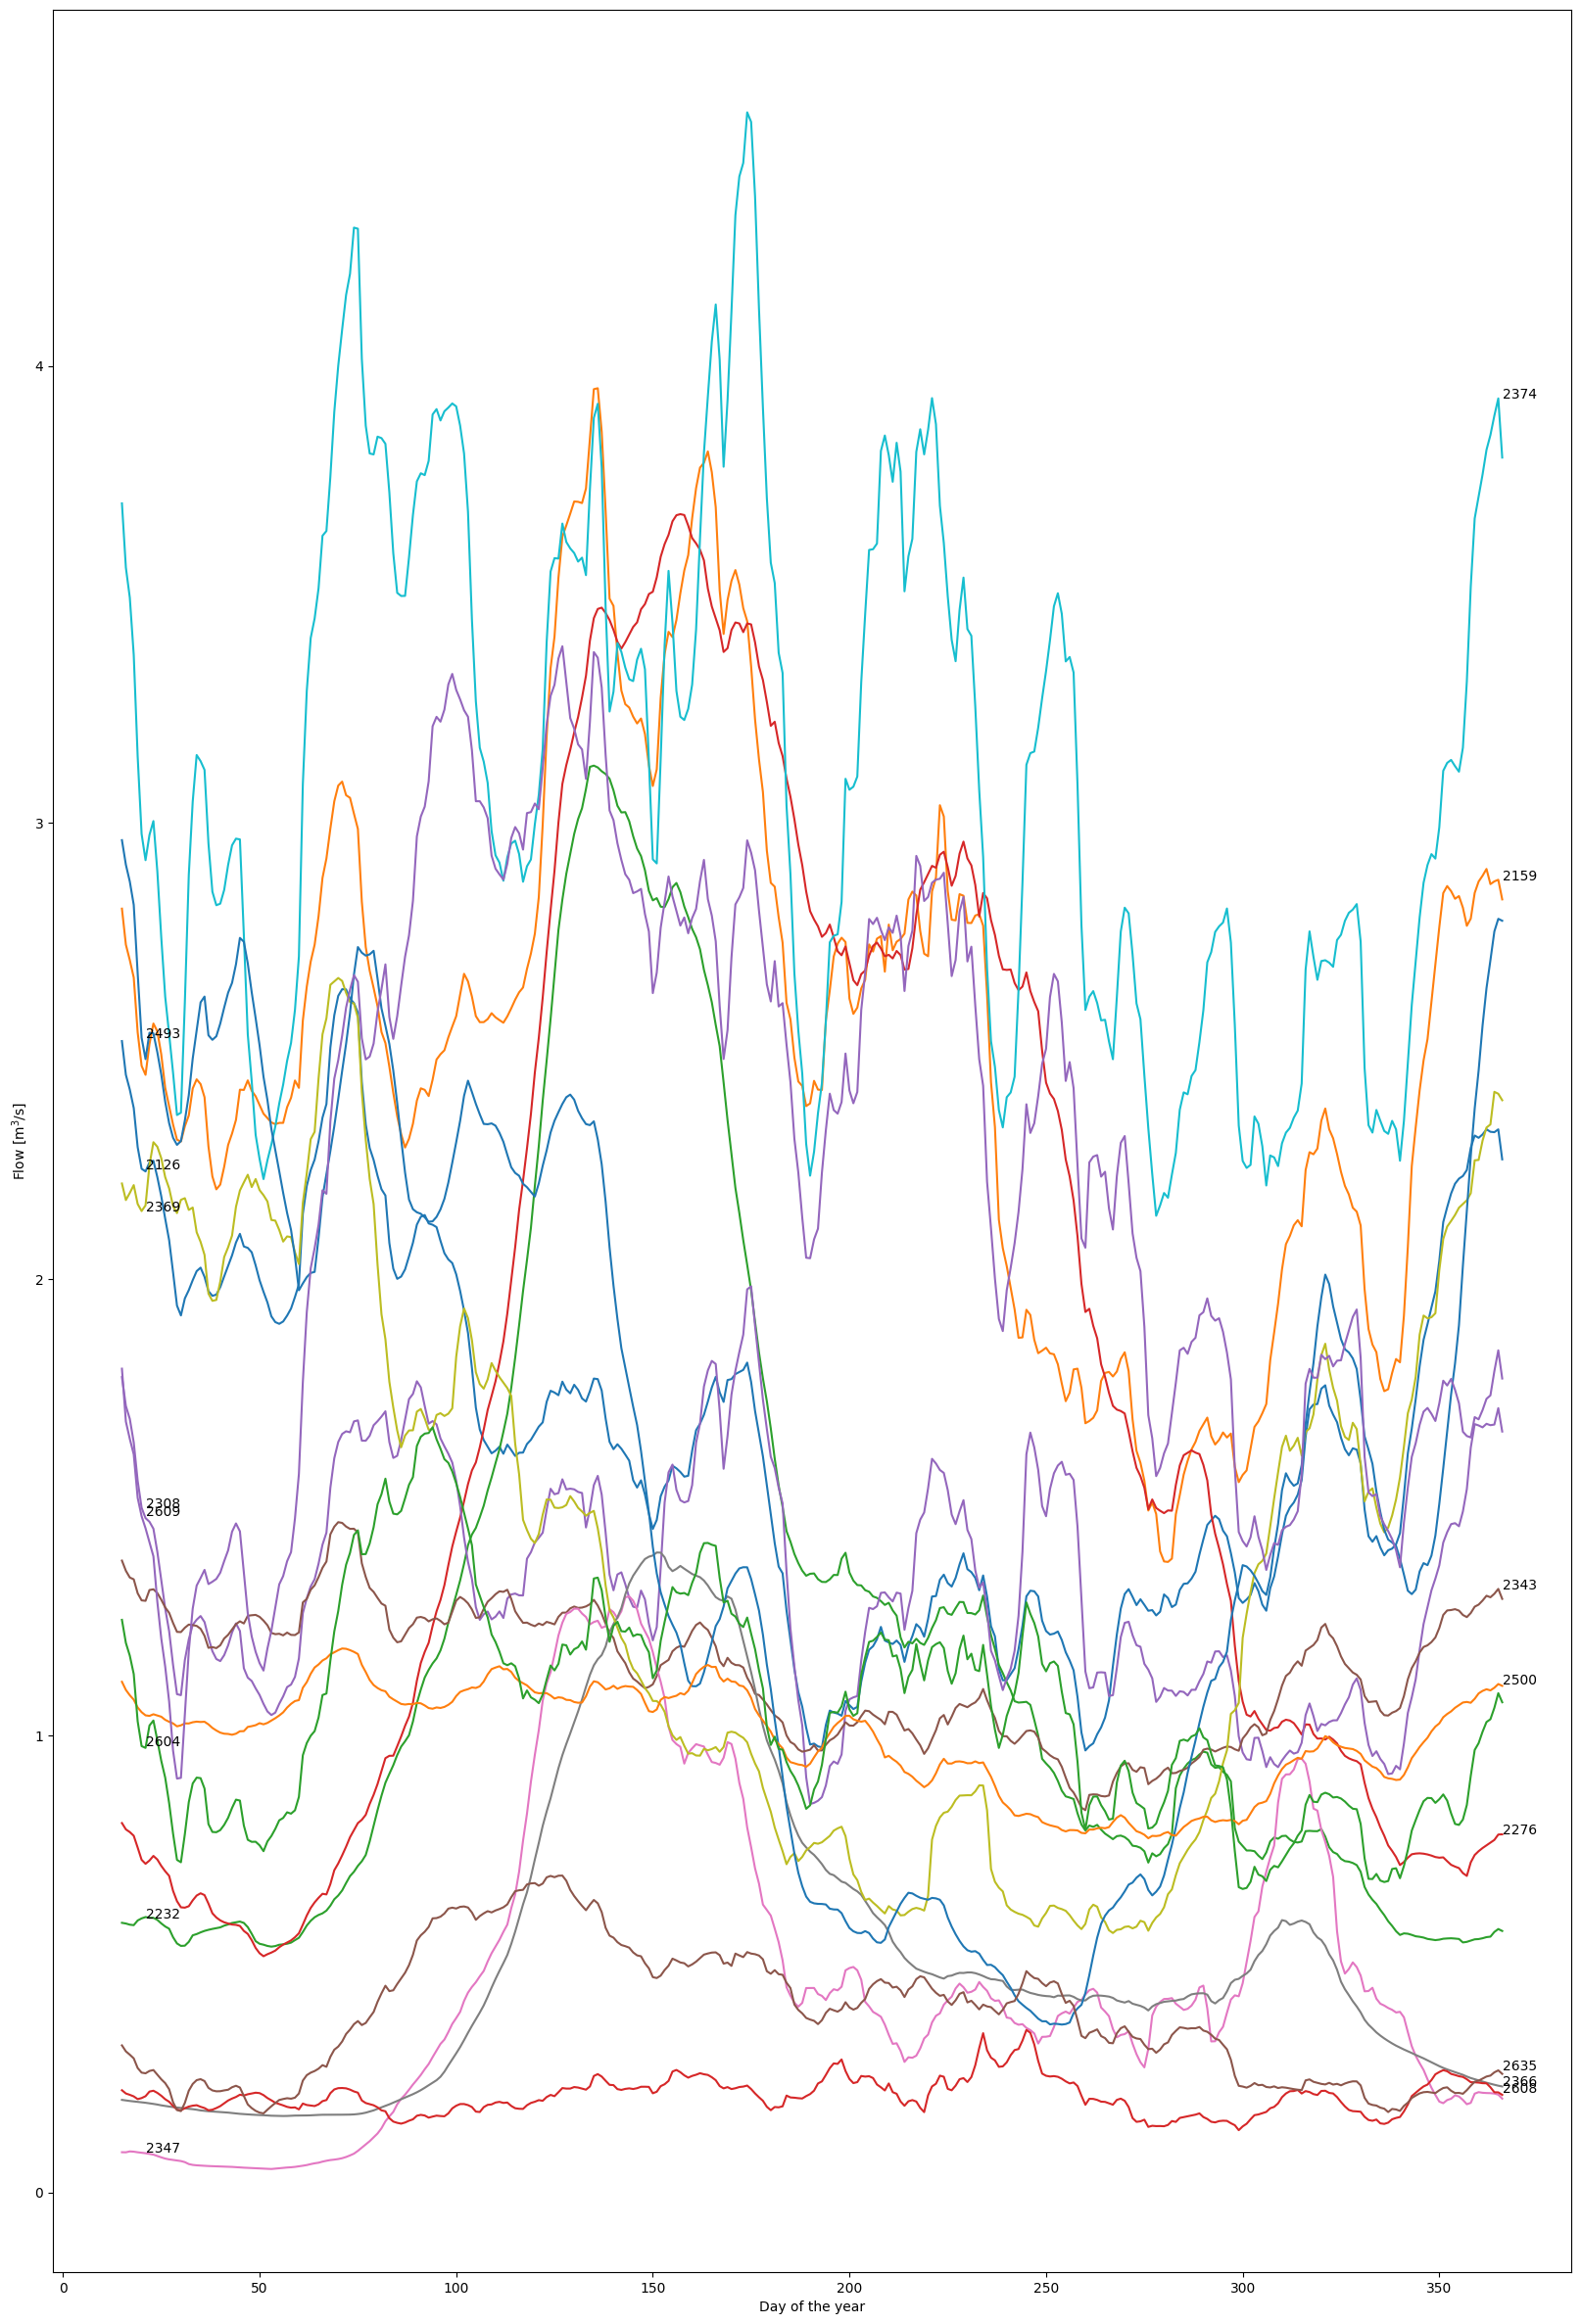

In [15]:
# plot the flow data of all the stations for max flow below 20
window_length_long = 15

i = 20

plt.figure(figsize=(20,30))
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_df = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    if(station_df[ Wert].max() < 5):
        plt.plot(station_df.index, station_df[Wert], label=station_number)
    
        plt.annotate(station_number, xy=(station_df.index[i], station_df[Wert][i]))
    
   
        if(i == 20):
            i = 365
        else:
            i=20
    #annotate the plotted points with the station number
#plot labels on the corresponding curve
plt.xlabel('Day of the year')
if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
plt.show()


## Results
- The less flow the more noisy the curve looks
- the curves with less flow are more difficult to analyze
- this is due to the fact, that smaller flows are more affected by rainfalls and other weather conditions
- the curves with more flow are more stable and therefore easier to analyze

## 2.2 visual inspection of typical curves for flow data
- to get a feeling for the data
- plot the chosen functions in one plot to see the general differences
- plot the chosen functions in different plots ti have a look at std and average time over a certain value
 

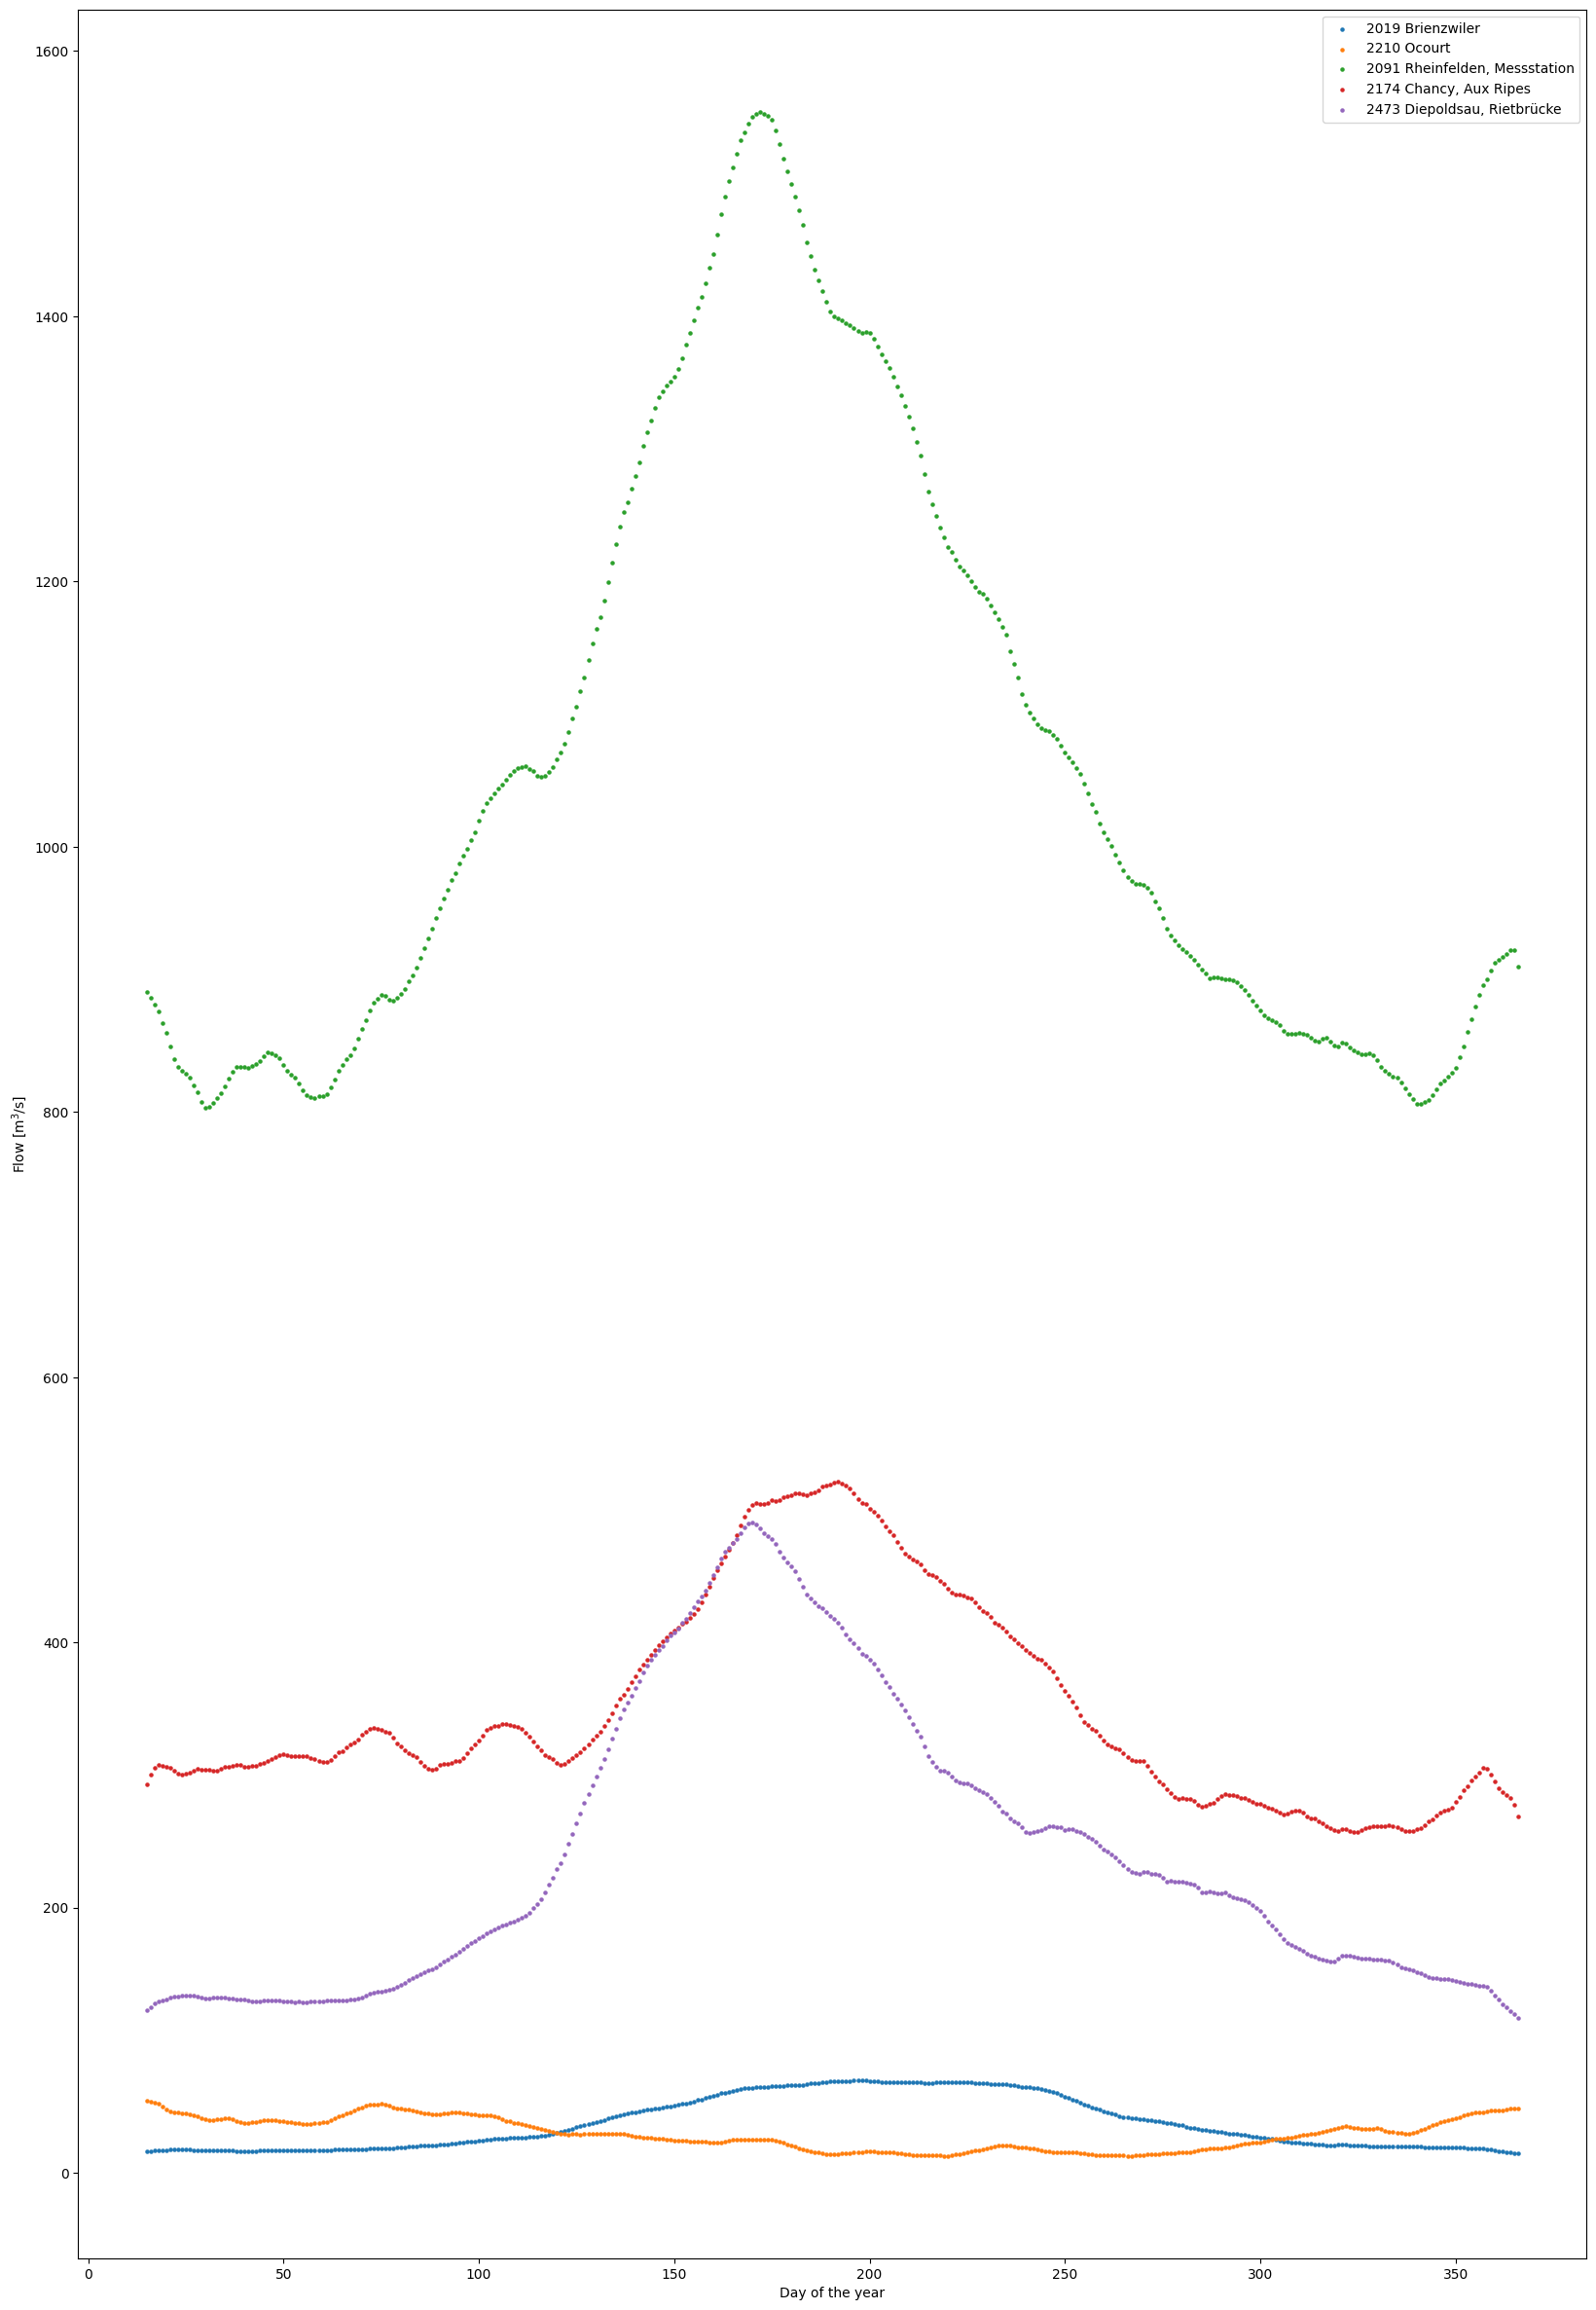

In [16]:
special_stations_numbers = [2019,2210,2091,2174, 2473]

labels = list()
#plot the stations belonging to the special station numbers
plt.figure(figsize=(20,30))
for station in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station, 15, flow_temp_df, Wert)
    plt.scatter(station_data.index, station_data[Wert], s = 5)
    station_data['mean'] = station_data[Wert].mean()
    #plt.plot(station_data.index, station_data['mean'])
    #add to each curve the number and name of the station
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station]['Stationsname'].unique()[0]
    labels.append(str(station)+ " " + station_name)       
plt.xlabel('Day of the year')

if Wert == 'Flow_Wert':
    plt.ylabel('Flow [m$^3$/s]')
else:
    plt.ylabel('Temperature [°C]')
    
plt.legend(labels)


## Results:
- It is clearly visible that we got different averages and different std's
- The flux starts increasing at different times
- some of the stations are highly influenced by rainfalls or dams

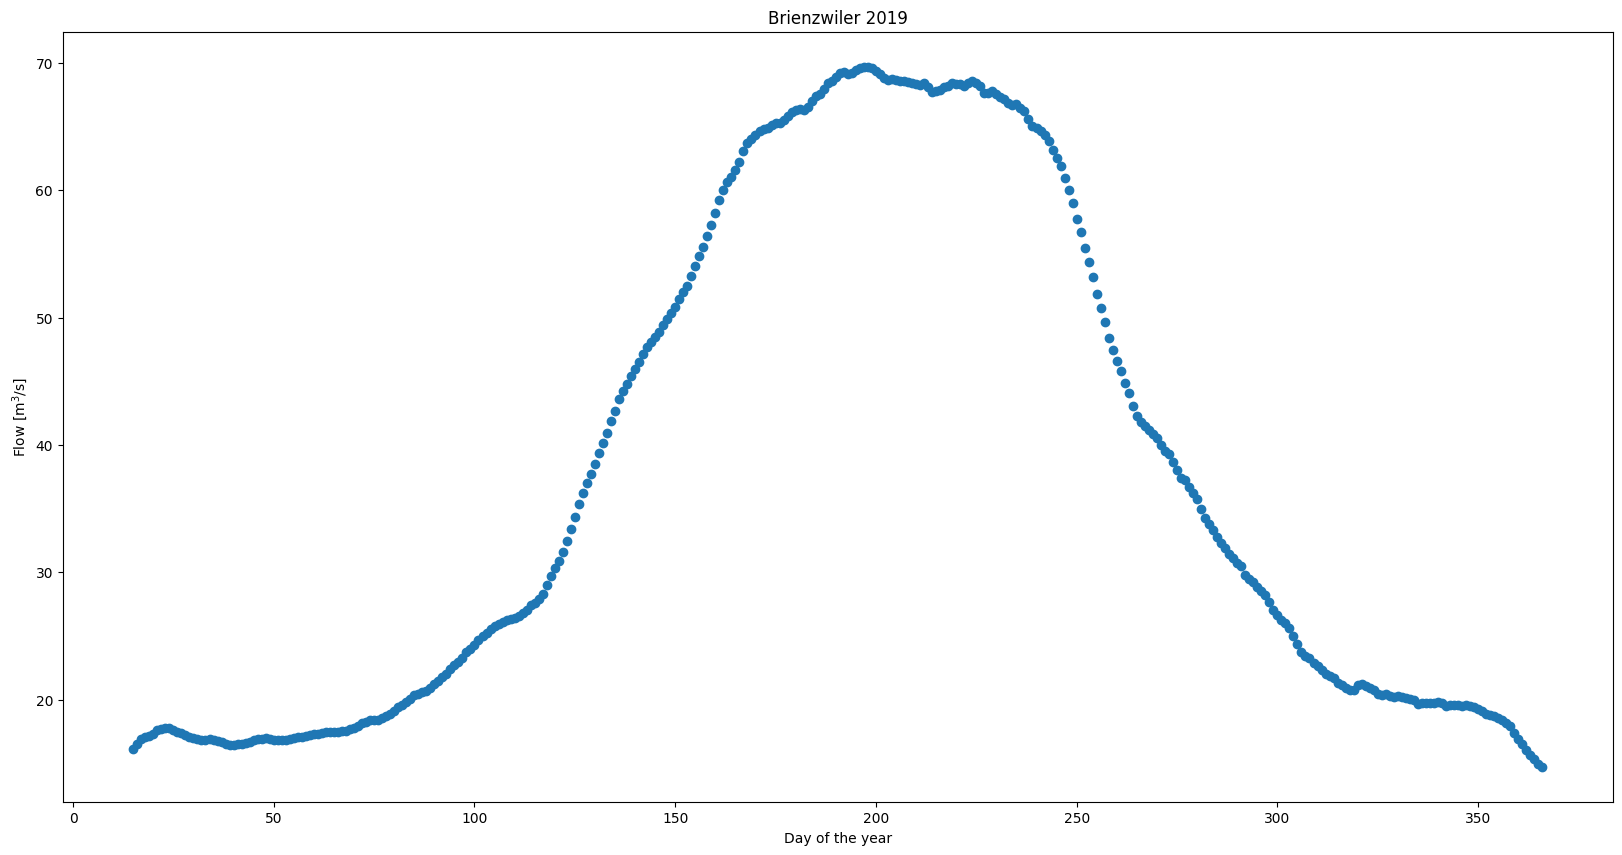

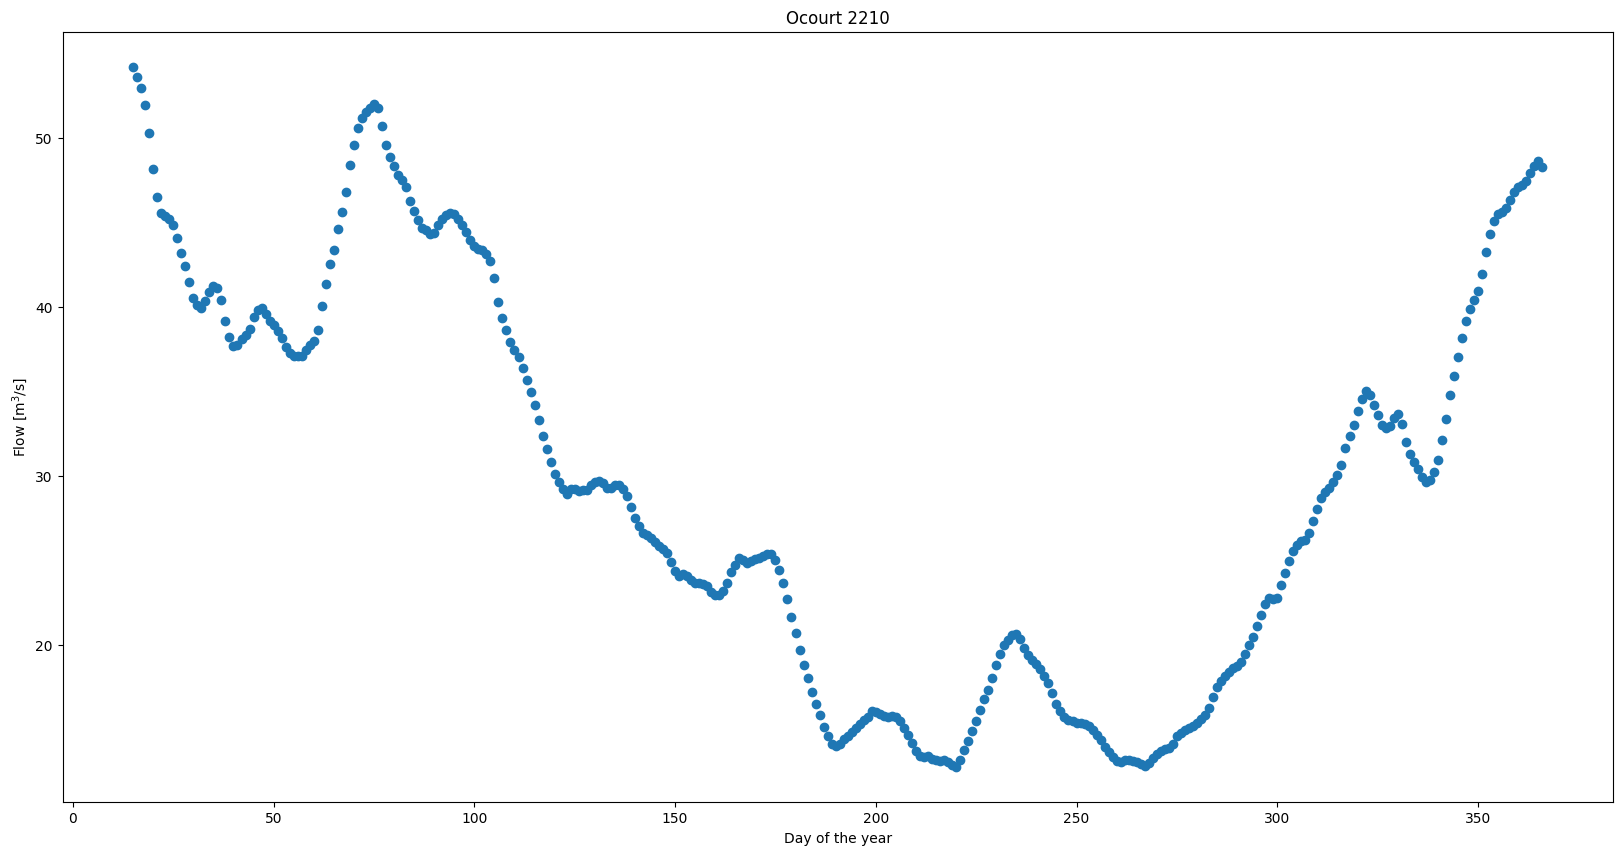

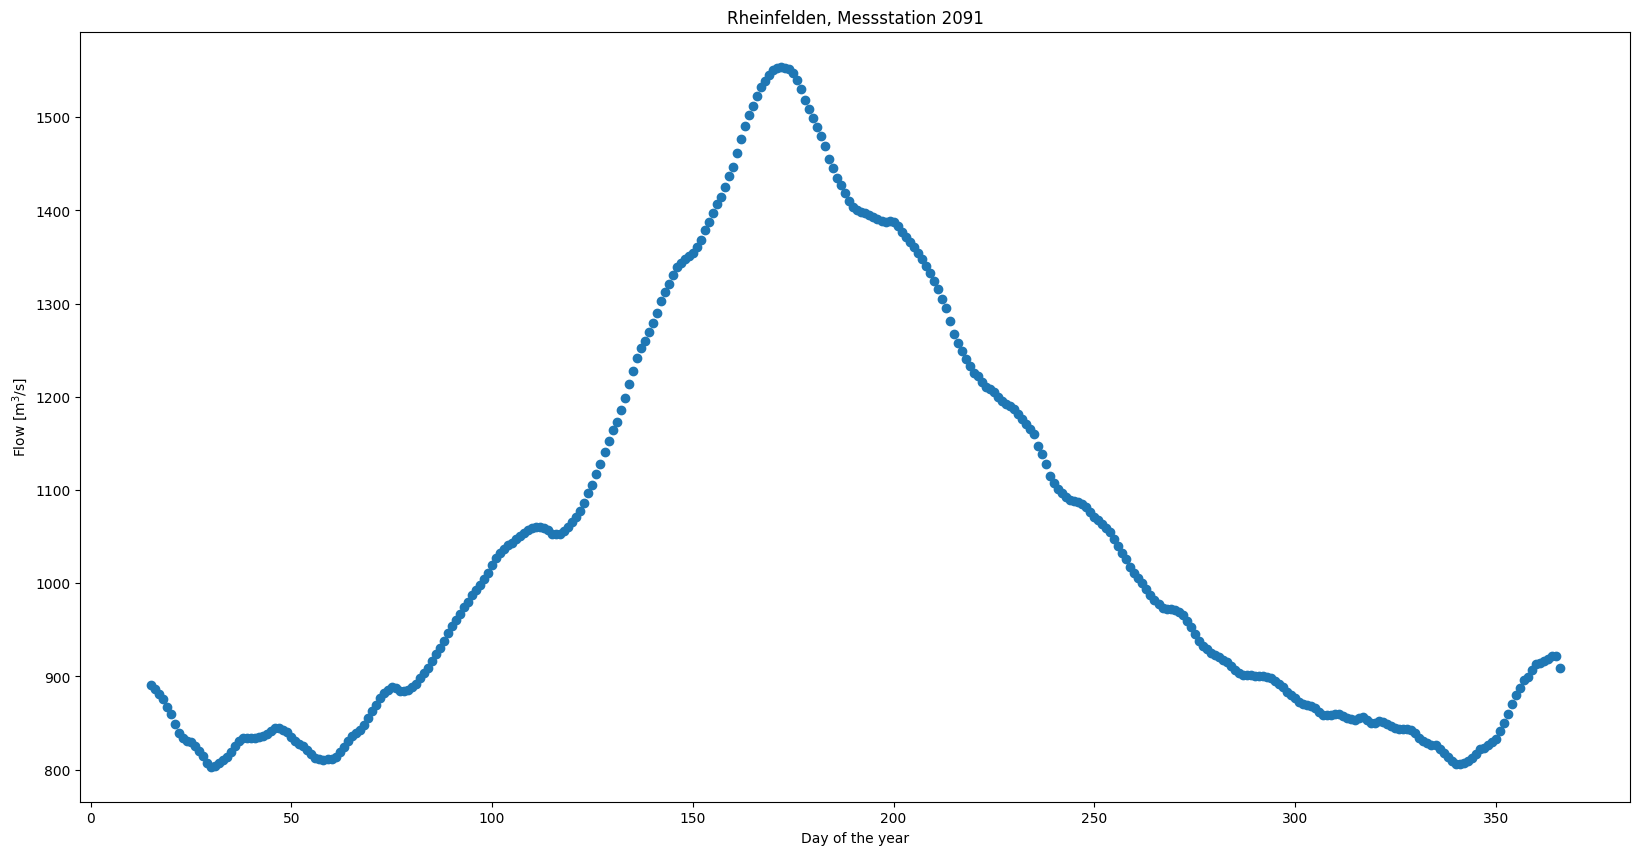

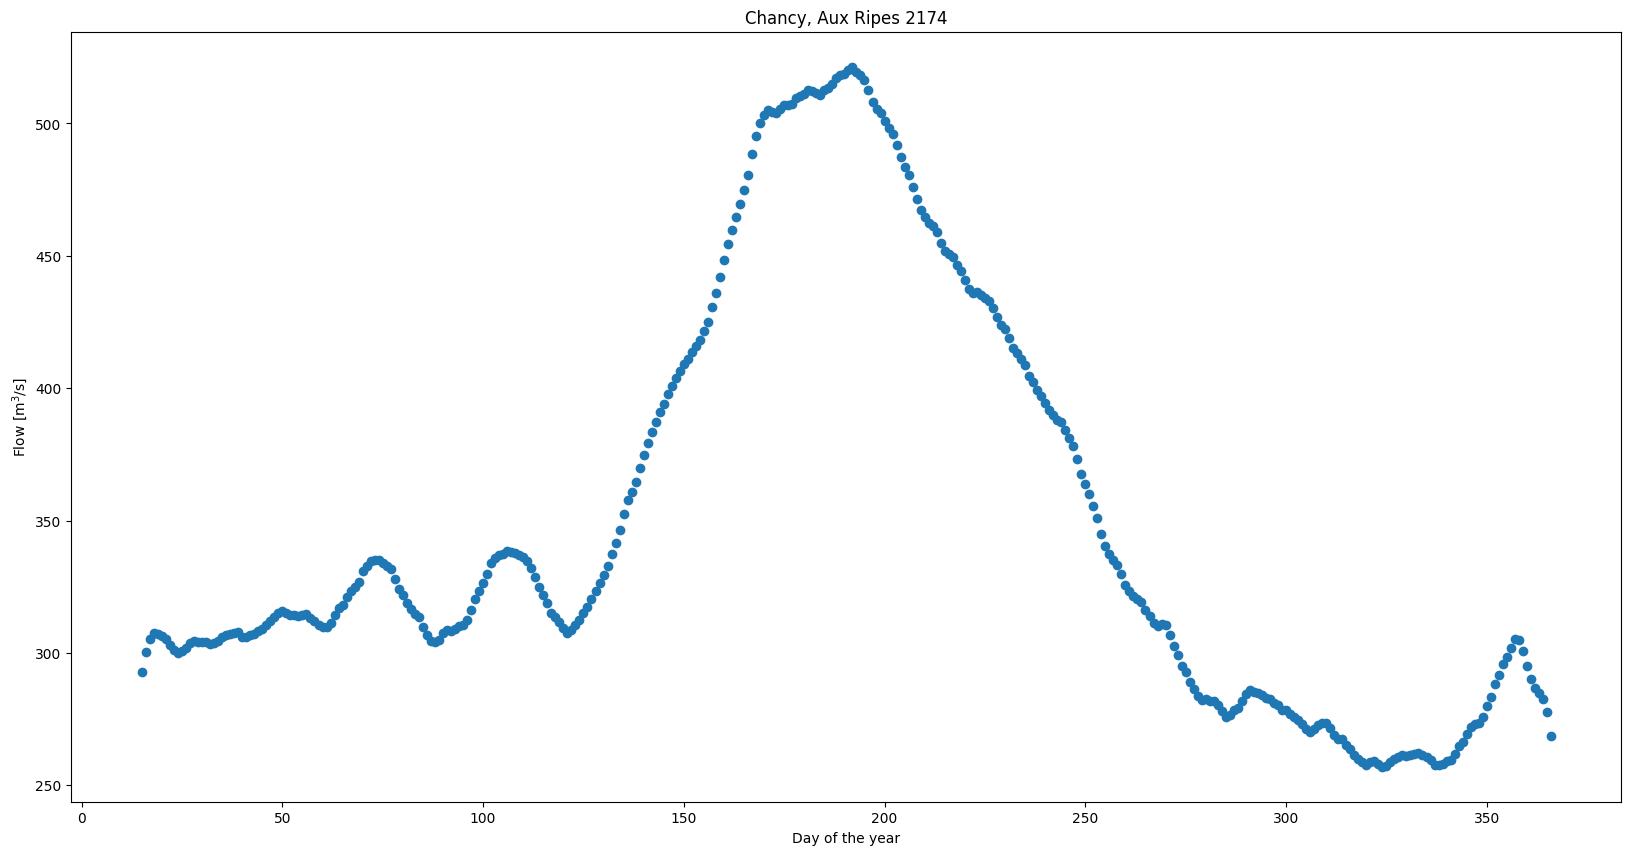

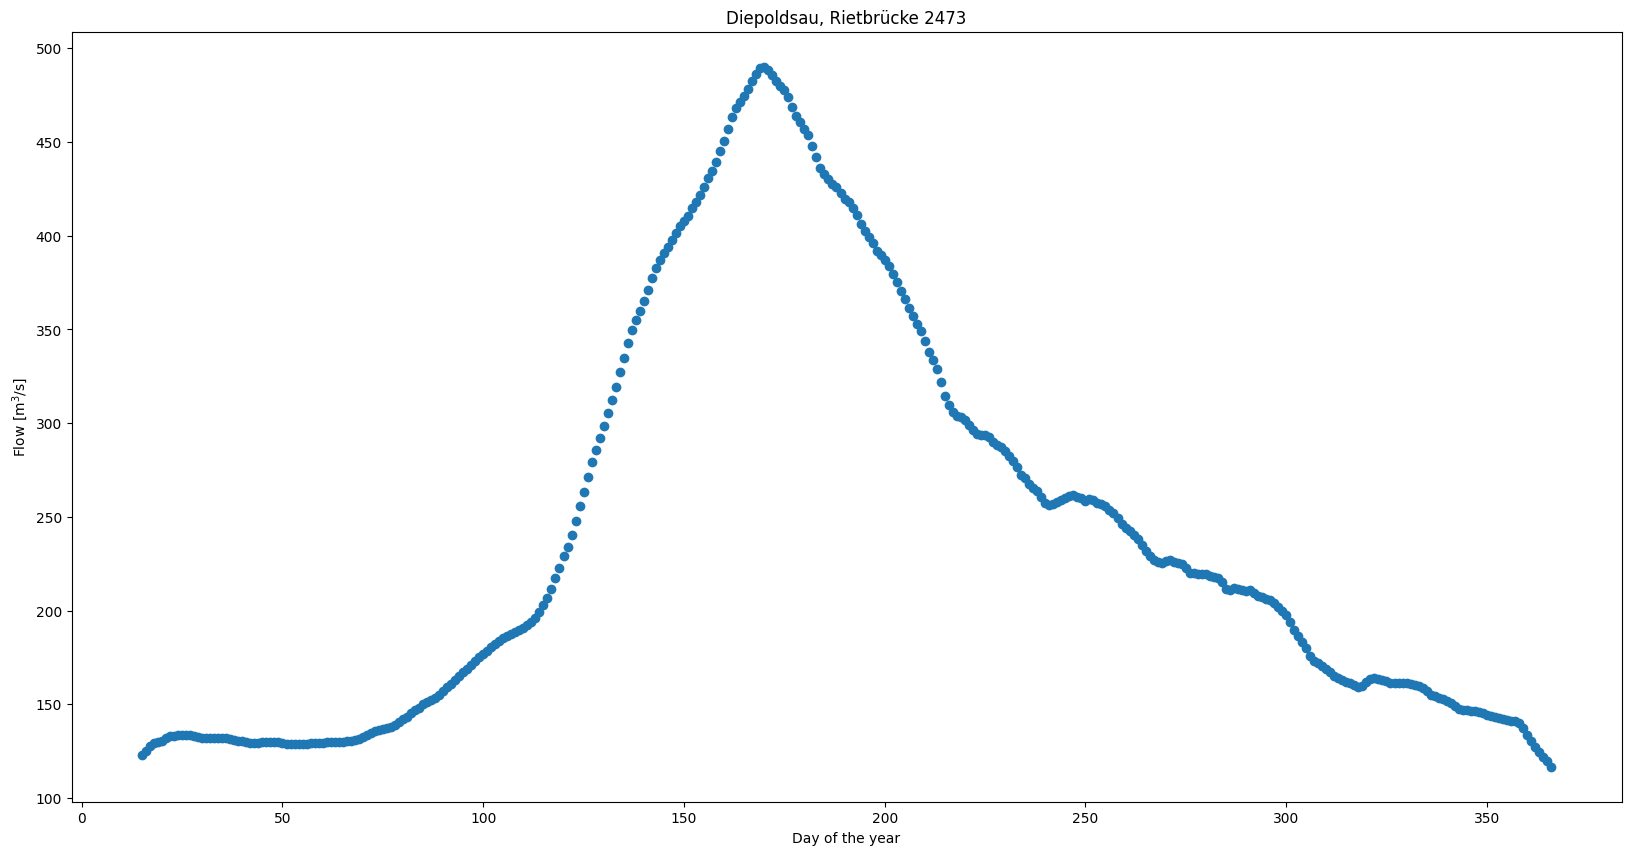

In [17]:
# plot the special stations seperatly

for station_number in special_stations_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(20,10))
    plt.scatter(station_data.index, station_data[Wert])
    #print stations name and number	as title
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    plt.title(station_name + ' ' + str(station_number))

    plt.xlabel('Day of the year')
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    
    plt.show()


## Results:
- we see three main types of curves
- 2019 with a steady increase and a long time period of high flow
- 2091 with a steep increase and a short time period of maximum flow and a high average flow
- 2210 with an abnormal flow pattern due to a dam, with high flow in winter and low flow in summer, additionally the flow is very irregular


# 3. Feature tests
- goal: to find features which characterize the above mentioned curves


In [18]:

# create df with same columns as staion_df
merged_station_running_df = pd.DataFrame(columns=['Zeitstempel', 'Stationsnummer',	'Flow_Wert', 	'Temp_Wert'])
chosen_example_station_numbers = [2019,2210,2091]

for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    merged_station_running_df = merged_station_running_df.append(station_data)

merged_station_running_df.head()



C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\3474461945.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\3474461945.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\3474461945.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_station_running_df = merged_station_running_df.append(station_data)


Zeitstempel  Stationsnummer  Flow_Wert  Temp_Wert
1         NaN          2019.0        NaN   4.062250
2         NaN          2019.0        NaN   3.931463
3         NaN          2019.0        NaN   3.888293
4         NaN          2019.0        NaN   3.790000
5         NaN          2019.0        NaN   3.802195

In [19]:
#calculate the mean of the running mean, std, min, max, median, values for each station and save them to df ruda_features_df
basic_features_df = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median'])
for station_number in chosen_example_station_numbers:
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
basic_features_df.head()

C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\752196699.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\752196699.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_df = basic_features_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': sta

Stationsnummer         mean         std         min          max  \
0          2019.0    37.377797   19.845988   14.741146    69.685184   
1          2210.0    29.369641   11.948027   12.824196    54.216881   
2          2091.0  1050.838014  225.168084  803.101167  1554.169571   

       median       range  
0   29.096628   54.944038  
1   29.085600   41.392685  
2  971.948023  751.068405

## 3.1 Show the different features in the plotted data

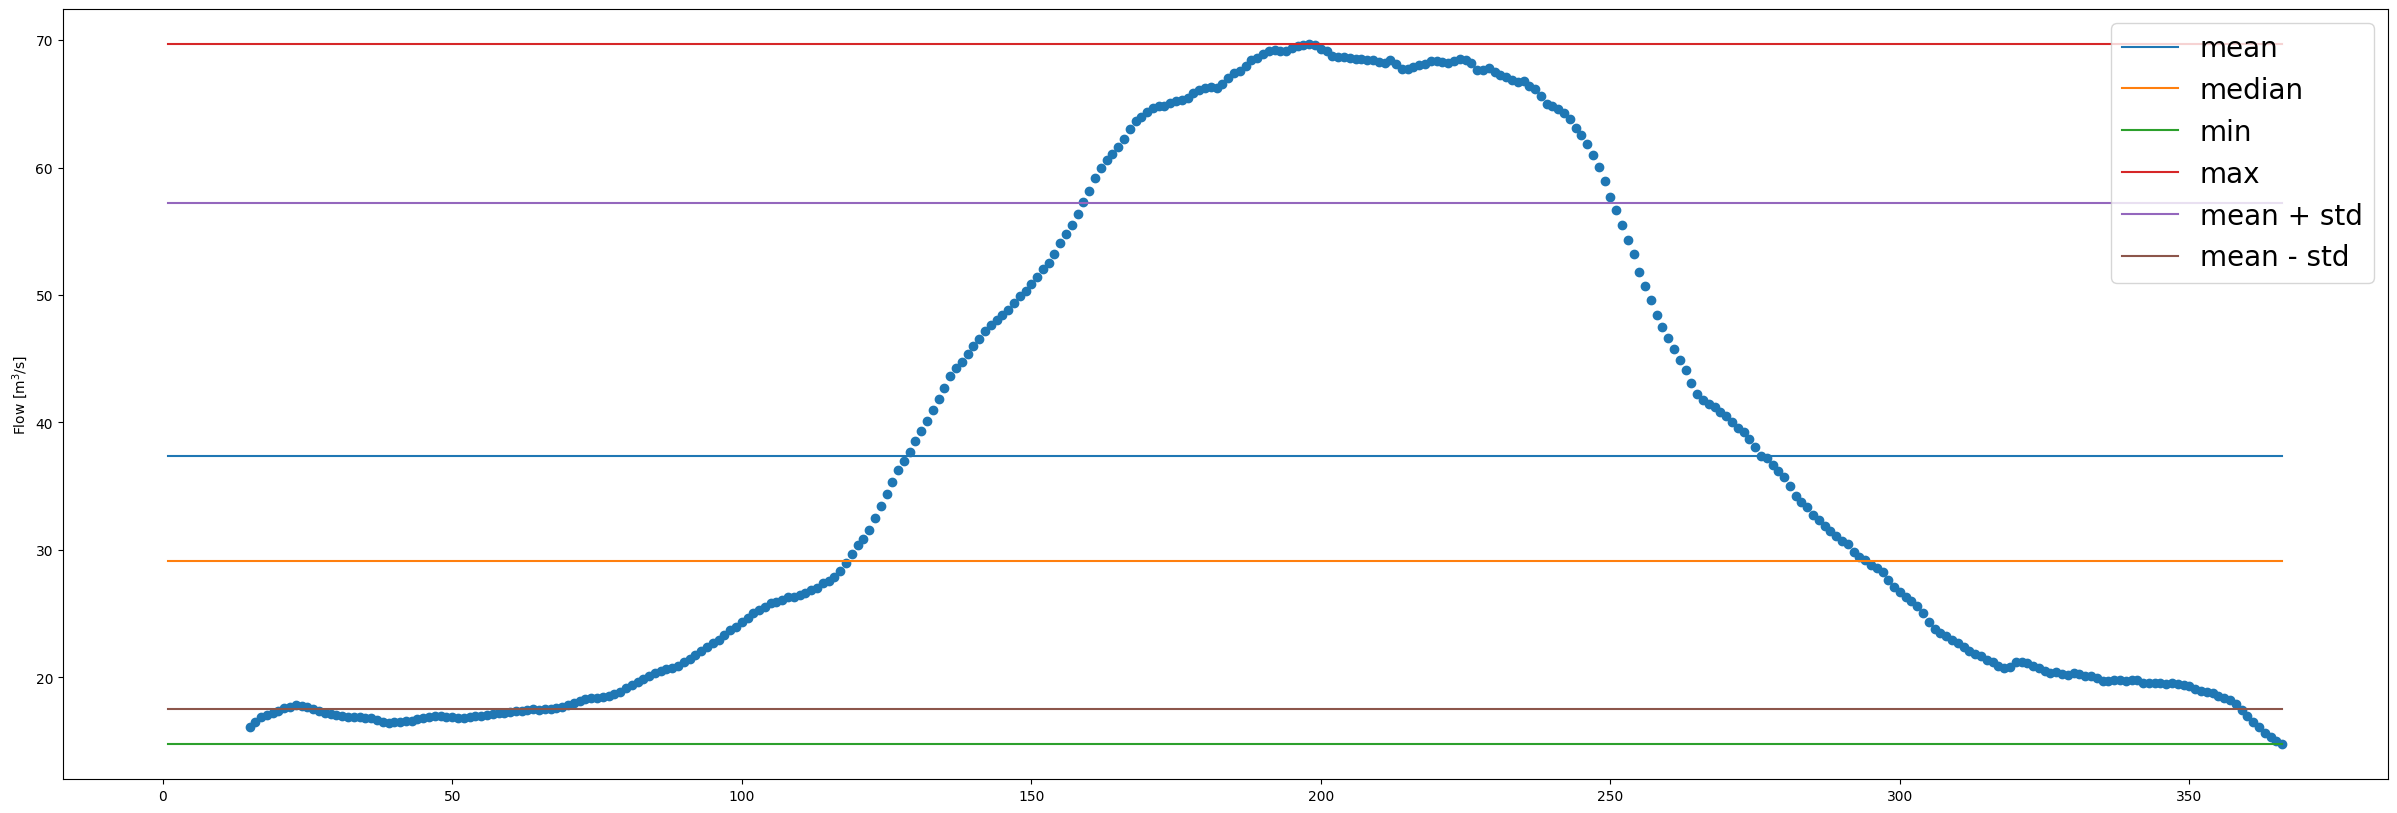

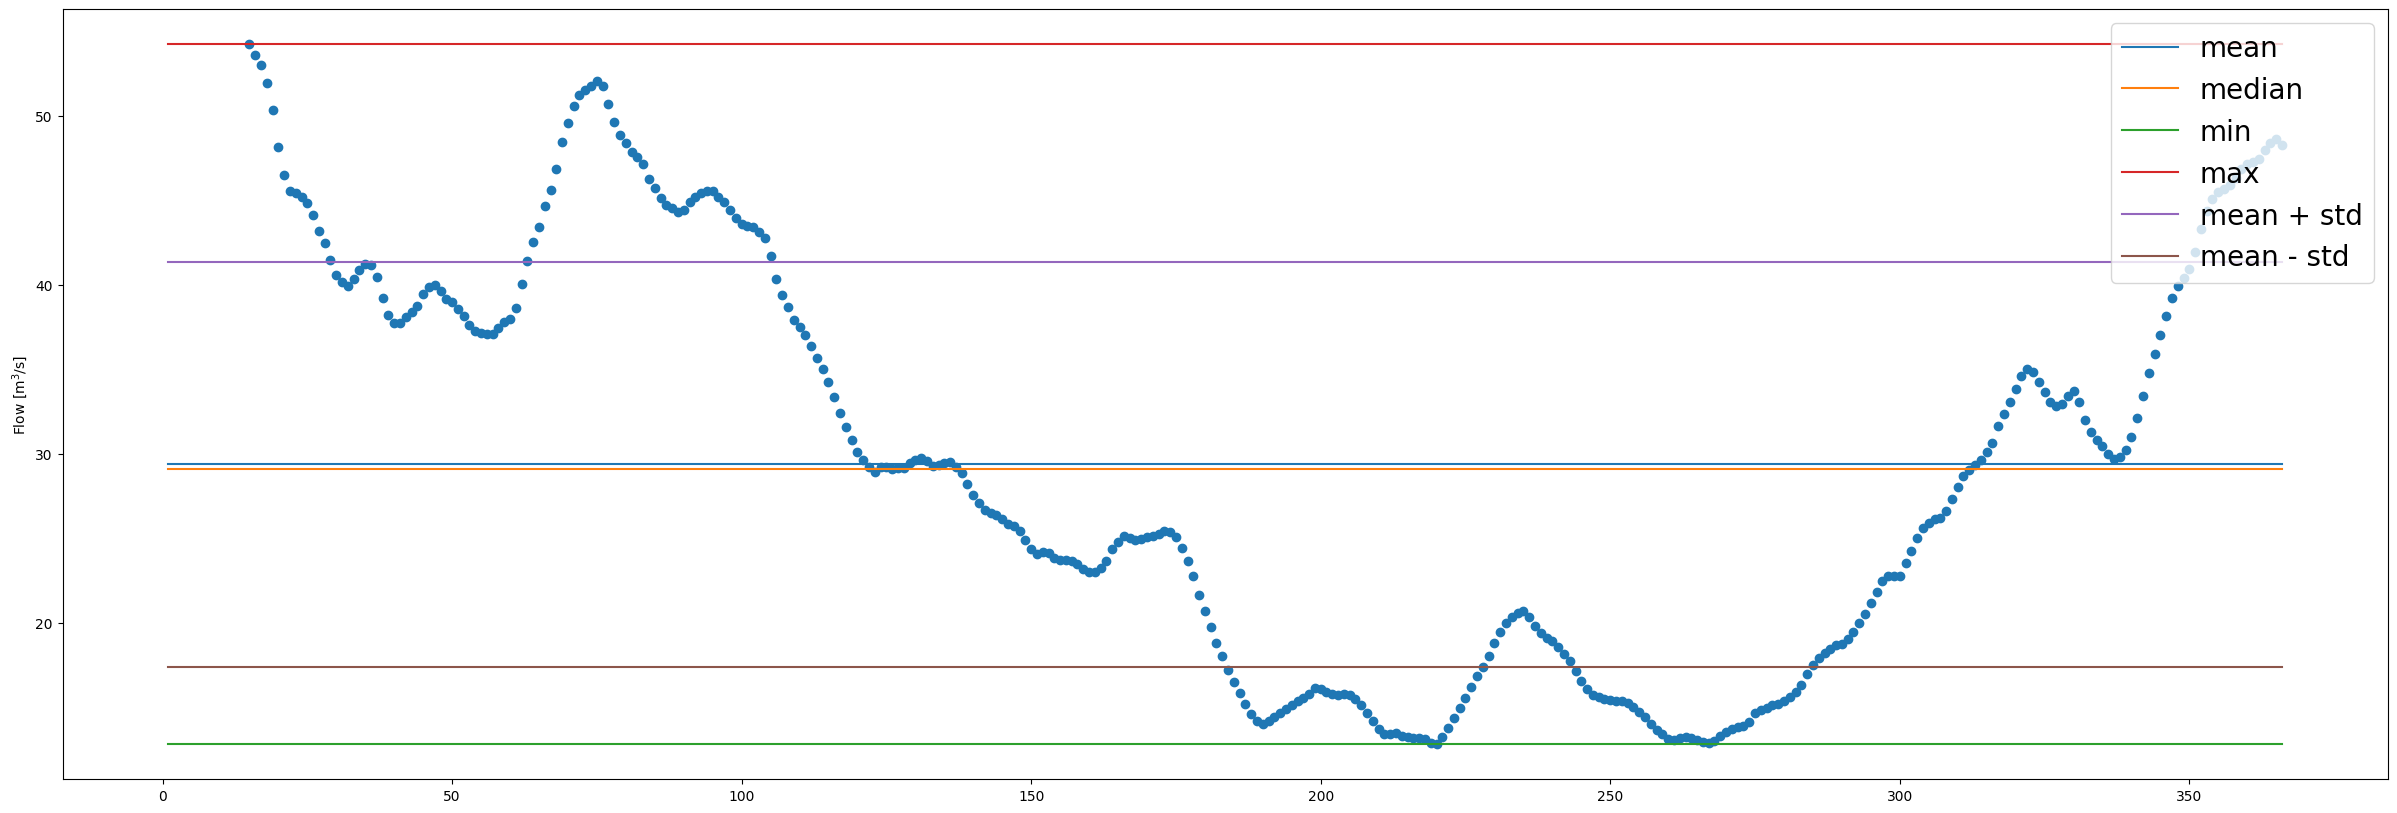

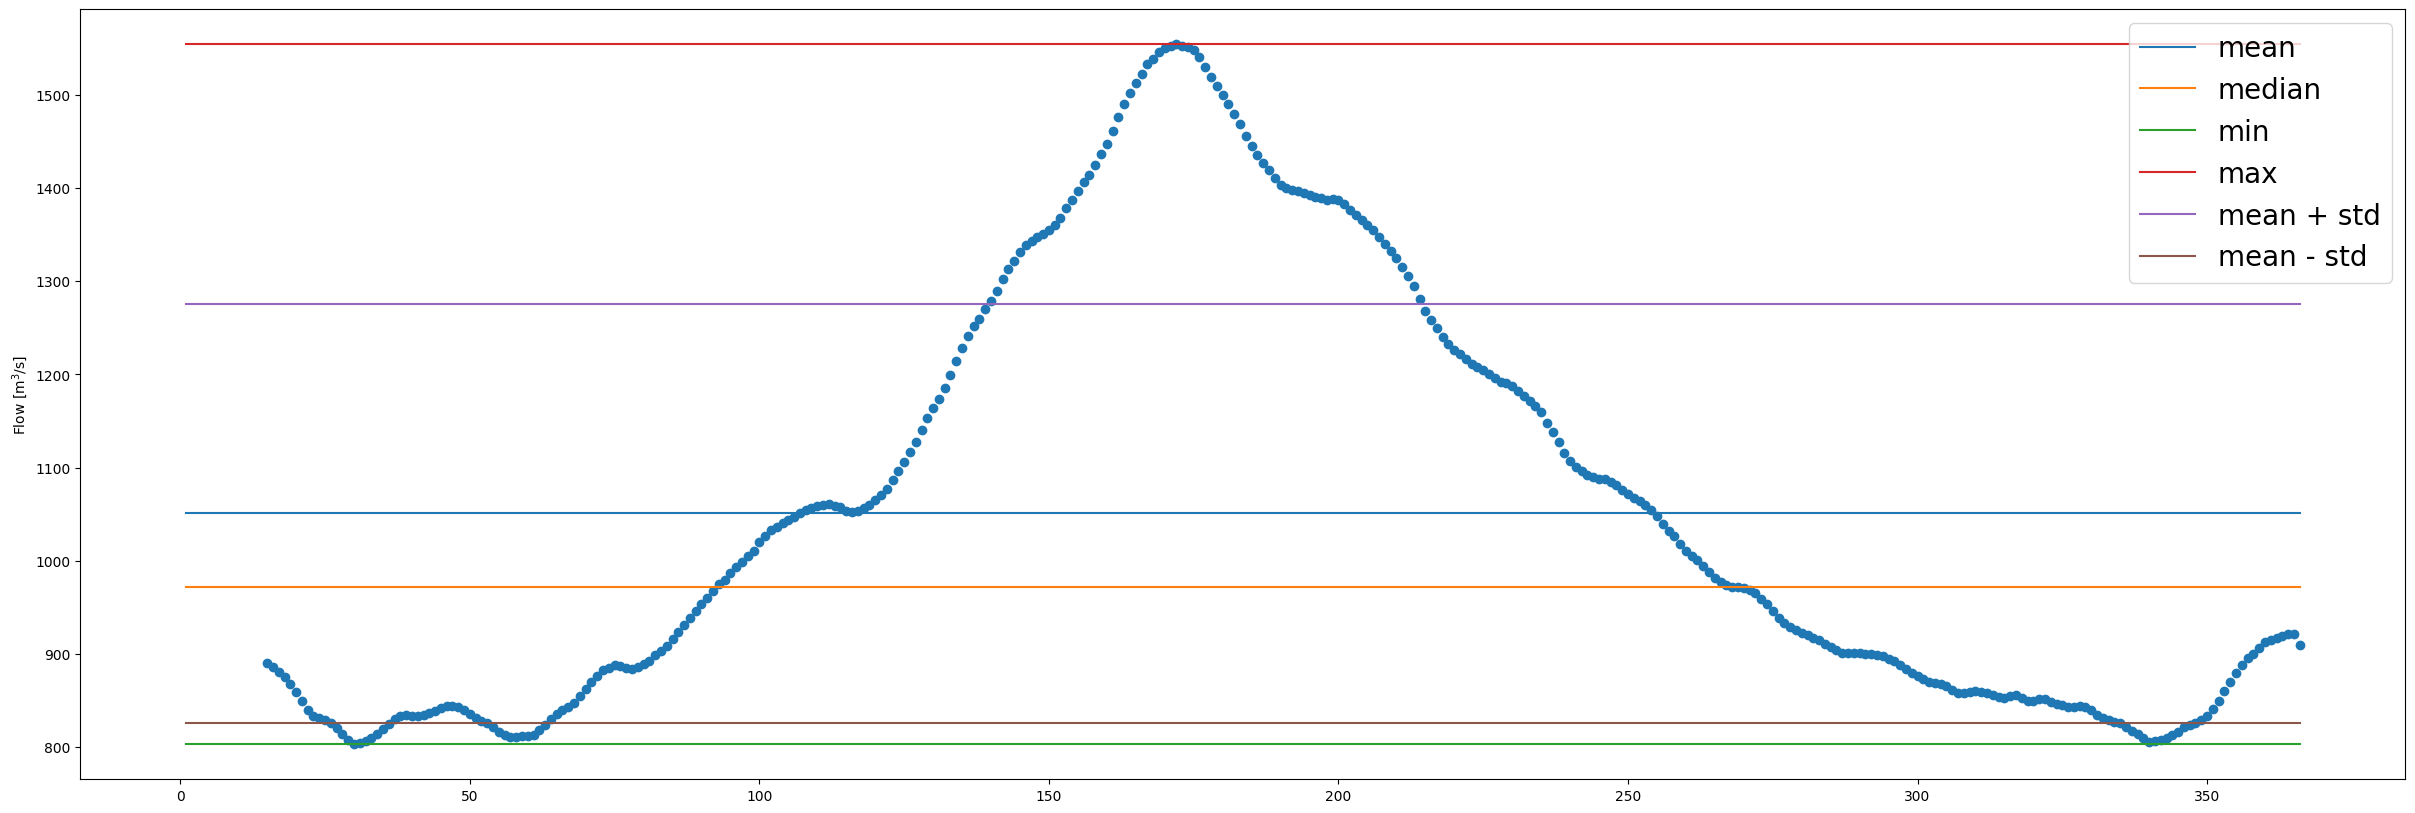

In [20]:
for station_number in chosen_example_station_numbers:
    #plot min, max and mean and median of each station
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    plt.figure(figsize=(30,10))
    plt.scatter(station_data.index, station_data[Wert])
    plt.plot(station_data.index, [station_data[Wert].mean()] *366, label='mean')
    plt.plot(station_data.index, [station_data[Wert].median()]*366, label='median')
    plt.plot(station_data.index, [station_data[Wert].min()]*366, label='min')
    plt.plot(station_data.index, [station_data[Wert].max()]*366, label='max')
    # plot the standard deviation in an appropriate way
    plt.plot(station_data.index, [station_data[Wert].mean() + station_data[Wert].std()]*366, label='mean + std')
    plt.plot(station_data.index, [station_data[Wert].mean() - station_data[Wert].std()]*366, label='mean - std')
    station_name = flow_temp_df.loc[flow_temp_df['Stationsnummer'] == station_number]['Stationsname'].unique()[0]
    #plt.title(station_name + ' ' + str(station_number))
    #make bigger legend
    plt.legend( loc="upper right", fontsize = "20")
    if Wert == 'Flow_Wert':
        plt.ylabel('Flow [m$^3$/s]')
    else:
        plt.ylabel('Temperature [°C]')
        
    plt.ylabel('Flow [m$^3$/s]')

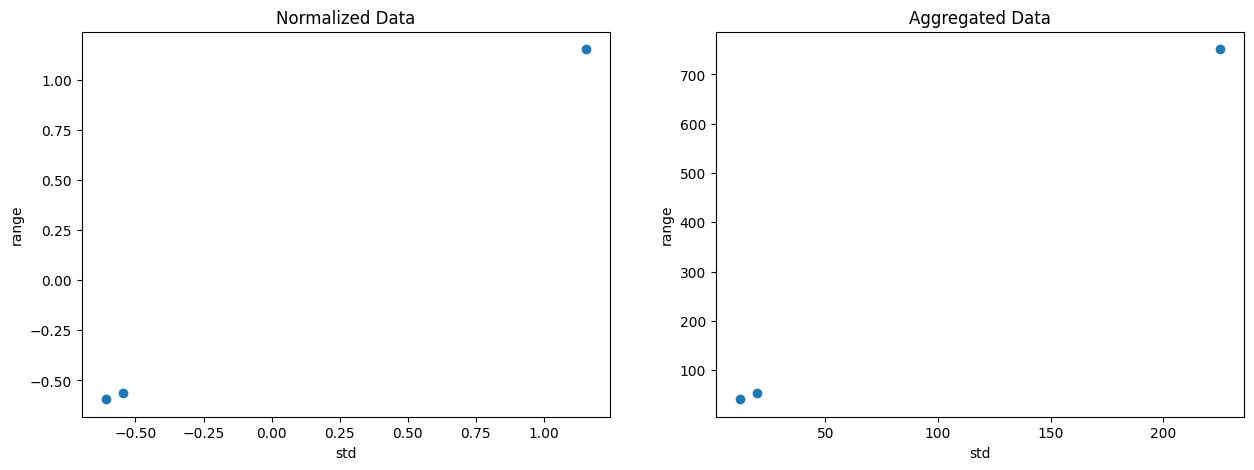

In [21]:
#plot the range and std of the ruda_fetures_df in a scatterpllot
basic_normalized_chosen_df = dfmf.normalize_data(basic_features_df)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.set_xlim(-10,600)
# ax2.set_xlim(-10,600)
# ax1.set_ylim(-10,16)
# ax2.set_ylim(-10,16)
ax1.scatter(basic_normalized_chosen_df['std'], basic_normalized_chosen_df['range'])
ax1.set_title('Normalized Data')
ax1.set_xlabel('std')
ax1.set_ylabel('range')
ax2.scatter(basic_features_df['std'], basic_features_df['range'])
ax2.set_title('Aggregated Data')
ax2.set_xlabel('std')
ax2.set_ylabel('range')
plt.show()

c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'y_MDS')

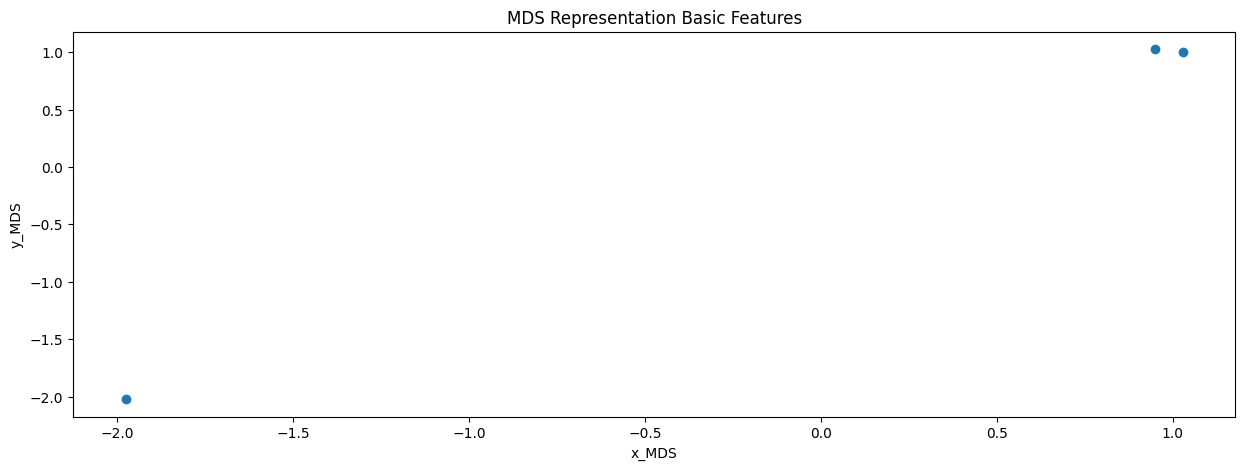

In [22]:
basic_mds_chosen_rep = dfmf.create_mds_represntation(basic_normalized_chosen_df)
#plot the mds
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
ax1.scatter(basic_mds_chosen_rep['x_MDS'], basic_mds_chosen_rep['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')

## Results:
- looks like might give good clustering results


## 3.2 check with mds for all station

C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\2226648807.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_all_df = basic_features_all_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)
C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\2226648807.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basic_features_all_df = basic_features_all_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].medi

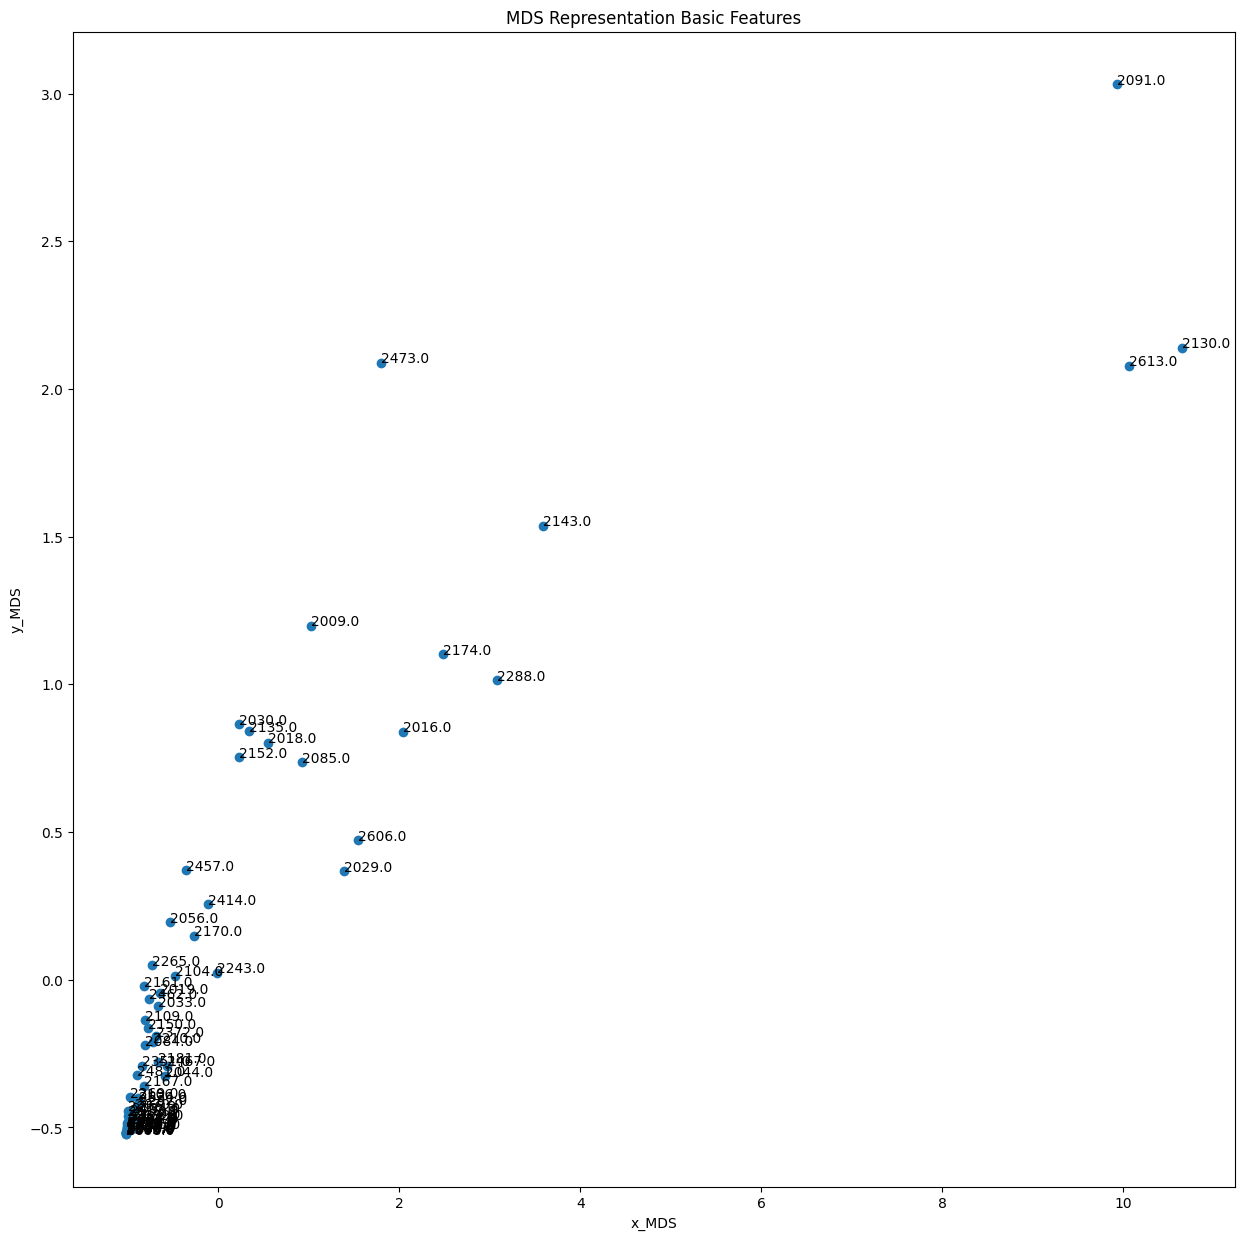

In [23]:
basic_features_all_df = pd.DataFrame(columns=['Stationsnummer', 'mean', 'std', 'min', 'max', 'median', 'range'])
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    basic_features_all_df = basic_features_all_df.append({'Stationsnummer': station_number, 'mean': station_data[Wert].mean(), 'std': station_data[Wert].std(), 'min': station_data[Wert].min(), 'max': station_data[Wert].max(), 'median': station_data[Wert].median(), 'range': station_data[Wert].max()-station_data[Wert].min()}, ignore_index=True)

basic_features_normalized_all_df = dfmf.normalize_data(basic_features_all_df)
basic_mds_all_df = dfmf.create_mds_represntation(basic_features_normalized_all_df)

#plot the mds representation
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 15))
ax1.scatter(basic_mds_all_df['x_MDS'], basic_mds_all_df['y_MDS'])
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
# add stationsnummer to each point
for i, txt in enumerate(basic_mds_all_df['Stationsnummer']):
    ax1.annotate(txt, (basic_mds_all_df['x_MDS'][i], basic_mds_all_df['y_MDS'][i]))

## Results:
- clusters can be seen visually on the mds plot
- this already with rudimentary features and no feature selection
- the clusters are not perfect but they are clearly visible


# 4. Additional Features
- goal: to find the best features for the clustering
- calculate a lot of features and then select the best ones
- as discussed in the meeting 
    - max slope of the curve (done could be better)
    - time of Scheitelpunkt (done)
    - time above a average (done)
    - time of first upwards crossing of a threshold (done and downwards as well)
    - number of local maximas (not done)
    

In [24]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#max slope of the running mean
additional_features_all = pd.DataFrame()
for station_number in flow_temp_df['Stationsnummer'].unique():
    station_data = dfmf.get_running_mean_df(station_number, window_length_long, flow_temp_df, Wert)
    original_station_data = dfmf.get_station_df(station_number, flow_temp_df)
    #additional_features_all = additional_features_all.append({'Stationsnummer': station_number, 'max_slope': dfmf.get_max_slope(station_data),'day_of_max': dfmf.get_day_of_max(station_data)}, ignore_index=True, )
    additional_features_all = additional_features_all.append({
        'Stationsnummer': station_number,
              'time_above_average': dfmf.get_time_above_average(station_data,Wert),
                        'similarity_to_mean_year': dfmf.get_similarity_to_mean_year(original_station_data,Wert),
                        'day_of_max': dfmf.get_day_of_max(station_data,Wert),
                          'day_first_upward_crossing_mean': dfmf.get_time_first_upward_crossing_mean(station_data,Wert),
                          'day_first_downward_crossing_mean' : dfmf.get_time_first_downward_crossing_mean(station_data,Wert),
                            'day_first_upward_crossing_high_quartile' :dfmf.get_time_first_upward_crossing_highquantile(station_data,Wert),
                              'day_downward_crossing_high_quartile' :dfmf.get_time_first_downward_crossing_highquantile(station_data,Wert),
                                'day_downward_crossing_low_quartile' :dfmf.get_time_first_downward_crossing_lowquantile(station_data,Wert),
                                'day_upward_crossing_low_quartile' :dfmf.get_time_first_upward_crossing_lowquantile(station_data,Wert),
                                #'number_of_maximas' : dfmf.get_number_of_maximas(station_data, Wert),
                                'number_of_peaks' : dfmf.get_number_of_peaks(station_data, Wert, 10),
                                'max_slope_5days': dfmf.get_max_slope(station_data,Wert,5),},       
                              ignore_index=True)

additional_features_all.head()

# removed features because unstable
#'max_slope_5days': dfmf.get_max_slope(station_data,'Flow_Wert',5),
                  #    'max_slope_2days': dfmf.get_max_slope(station_data,'Flow_Wert',2),


C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\696372664.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features_all = additional_features_all.append({
C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\696372664.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features_all = additional_features_all.append({
C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\696372664.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_features_all = additional_features_all.append({
C:\Users\janzu\AppData\Local\Temp\ipykernel_28772\696372664.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_feat

Stationsnummer  time_above_average  similarity_to_mean_year  day_of_max  \
0          2009.0               136.0             6.026368e+05       191.0   
1          2016.0               145.0             1.527663e+06       168.0   
2          2018.0               144.0             5.997054e+05       171.0   
3          2019.0               148.0             1.294845e+05       198.0   
4          2029.0               151.0             1.176514e+06       168.0   

   day_first_upward_crossing_mean  day_first_downward_crossing_mean  \
0                           135.0                             270.0   
1                            97.0                             241.0   
2                           121.0                             264.0   
3                           129.0                             276.0   
4                           101.0                             251.0   

   day_first_upward_crossing_high_quartile  \
0                                    158.0   
1                                    139.0   
2                                    148.0   
3                                    158.0   
4                                    139.0   

   day_downward_crossing_high_quartile  day_downward_crossing_low_quartile  \
0                                242.0                               282.0   
1                                181.0                                21.0   
2                                210.0                               283.0   
3                                251.0                               296.0   
4                                201.0                               259.0   

   day_upward_crossing_low_quartile  number_of_peaks  max_slope_5days  
0                             127.0             11.0        22.144363  
1                             358.0             12.0        27.734455  
2                             100.0              8.0        12.589743  
3                             118.0             12.0         5.967659  
4                              95.0             10.0        19.082642

# 5. All features together


c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\janzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


mean       std       min       max    median     range  Stationsnummer  \
0  0.426487  1.032352  0.225587  0.562418  0.277655  0.866365          2009.0   
1  0.993242  0.596083  1.161628  0.904861  1.006206  0.643076          2016.0   
2  0.202062  0.638822  0.074180  0.322229  0.174586  0.548136          2018.0   
3 -0.270591 -0.150262 -0.307291 -0.261083 -0.285957 -0.211755          2019.0   
4  0.628958  0.498810  0.707631  0.598974  0.579857  0.483319          2029.0   

   time_above_average  similarity_to_mean_year  day_of_max  \
0           -0.779040                 0.502967    0.703780   
1           -0.317361                 2.008994    0.312413   
2           -0.368659                 0.498194    0.363461   
3           -0.163469                -0.267368    0.822892   
4           -0.009576                 1.437292    0.312413   

   day_first_upward_crossing_mean  day_first_downward_crossing_mean  \
0                       -0.428829                          0.567401   
1                       -0.763944                          0.255445   
2                       -0.552292                          0.502858   
3                       -0.481742                          0.631943   
4                       -0.728668                          0.363016   

   day_first_upward_crossing_high_quartile  \
0                                -0.274481   
1                                -0.469172   
2                                -0.376950   
3                                -0.274481   
4                                -0.469172   

   day_downward_crossing_high_quartile  day_downward_crossing_low_quartile  \
0                             0.944840                            0.651451   
1                             0.203900                           -1.781239   
2                             0.556150                            0.660772   
3                             1.054159                            0.781940   
4                             0.446831                            0.437076   

   day_upward_crossing_low_quartile  number_of_peaks  max_slope_5days  
0                         -0.695285        -0.599222         0.545911  
1                          1.359263        -0.437561         0.802049  
2                         -0.935427        -1.084203         0.108118  
3                         -0.775333        -0.437561        -0.195306  
4                         -0.979898        -0.760882         0.405623

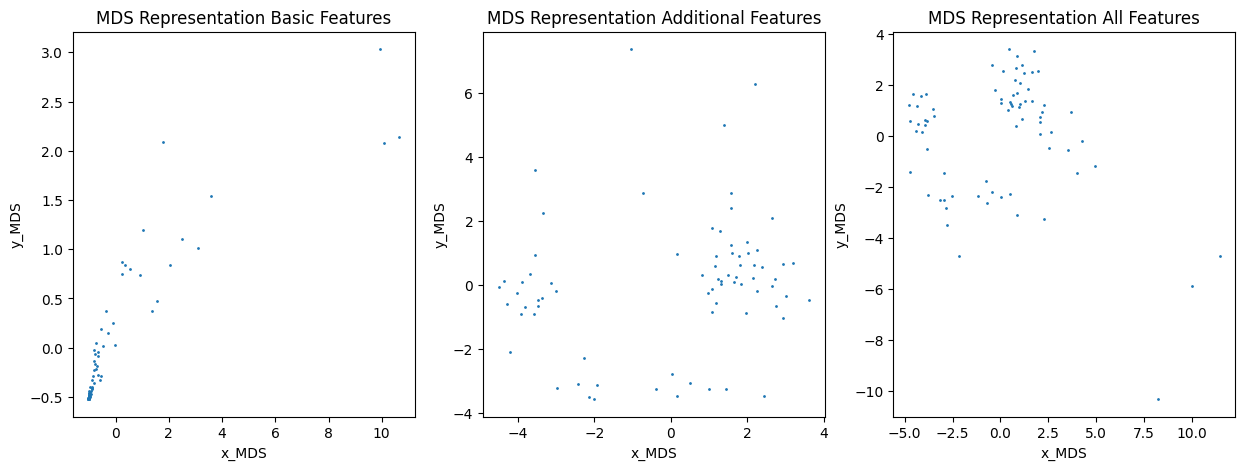

In [25]:
#calculate the more advanced features
import df_manipulation_functions as dfmf
#reload the df_manipulation_functions.py file
import importlib
importlib.reload(dfmf)


#concatenate all the features
all_features_all = pd.merge(basic_features_all_df, additional_features_all, on='Stationsnummer')
# normalize additional features
additional_features_all_normalized = dfmf.normalize_data(additional_features_all)
#concatenate the normalized additional features with the normalized basic features
all_normalized_all_df = pd.merge(basic_features_normalized_all_df, additional_features_all_normalized, on='Stationsnummer')
additional_features_all_mds = dfmf.create_mds_represntation(additional_features_all_normalized)

# get mds representation of the normalized additional features
all_mds_all_df = dfmf.create_mds_represntation(all_normalized_all_df)

#plot the mds for all features and the rudia features
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(basic_mds_all_df['x_MDS'], basic_mds_all_df['y_MDS'], s=1)
ax1.set_title('MDS Representation Basic Features')
ax1.set_xlabel('x_MDS')
ax1.set_ylabel('y_MDS')
ax2.scatter(additional_features_all_mds['x_MDS'], additional_features_all_mds['y_MDS'], s=1)
ax2.set_title('MDS Representation Additional Features')
ax2.set_xlabel('x_MDS')
ax2.set_ylabel('y_MDS')
ax3.scatter(all_mds_all_df['x_MDS'], all_mds_all_df['y_MDS'], s=1)
ax3.set_title('MDS Representation All Features')
ax3.set_xlabel('x_MDS')
ax3.set_ylabel('y_MDS')


#set scale to the same
ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())

#save all features to pickle file
all_features_all.to_pickle('Flow_Features/all_features_flow.pkl')

# save ruda features to pickle file
basic_features_all_df.to_pickle('Flow_Features/basic_features_flow.pkl')

# save additional features to pickle file
additional_features_all.to_pickle('Flow_Features/additional_features_flow.pkl')

#save all normalized features to pickle file
all_normalized_all_df.to_pickle('Flow_Features/all_normalized_flow.pkl')

#save ruda normalized features to pickle file
basic_features_normalized_all_df.to_pickle('Flow_Features/basic_normalized_flow.pkl')

#save additional features normalized to pickle file
additional_features_all_normalized.to_pickle('Flow_Features/additional_normalized_flow.pkl')

#save the mds data to pickle file
all_mds_all_df.to_pickle('Flow_mds/all_mds_flow.pkl')

#save th ruda mds data to pickle file
basic_mds_all_df.to_pickle('Flow_mds/basic_mds_flow.pkl')


all_normalized_all_df.head()


## Result 
- the clusters are visible
- the importance of the additional features is very clear


# 6. Take periodicity for certain features into account 
- for all day features use\
    - day_sin = sin (day /365 *2pi)\
    - day_cos = cos (day /365 *2pi)

as new feature

In [39]:
#create feature dataframe with periodicity taken into account
#take all features all and replace the day of the year features with their sin and cosine function
import importlib
importlib.reload(dfmf)

#day_of_max
all_features_all['day_of_max_sin'], all_features_all['day_of_max_cos'] = dfmf.get_sin_cos_rep(all_features_all['day_of_max'])
all_features_all= all_features_all.drop(['day_of_max'], axis=1)
#day_first_upward_crossing_mean
#day_first_upward_crossing_high_quartile
#day_downward_crossing_high_quartile
#day_downward_crossing_low_quartile


all_features_all.head()

Stationsnummer        mean        std         min         max      median  \
0          2009.0  191.718588  78.184269   99.655775  337.357060  146.840939   
1          2016.0  317.204267  56.663119  248.814842  448.665434  299.042810   
2          2018.0  142.028263  58.771445   75.528888  259.285767  125.308693   
3          2019.0   37.377797  19.845988   14.741146   69.685184   29.096628   
4          2029.0  236.547887  51.864645  176.469974  349.239436  209.973965   

        range  time_above_average  similarity_to_mean_year  \
0  237.701285               136.0             6.026368e+05   
1  199.850592               145.0             1.527663e+06   
2  183.756880               144.0             5.997054e+05   
3   54.944038               148.0             1.294845e+05   
4  172.769462               151.0             1.176514e+06   

   day_first_upward_crossing_mean  day_first_downward_crossing_mean  \
0                           135.0                             270.0   
1                            97.0                             241.0   
2                           121.0                             264.0   
3                           129.0                             276.0   
4                           101.0                             251.0   

   day_first_upward_crossing_high_quartile  \
0                                    158.0   
1                                    139.0   
2                                    148.0   
3                                    158.0   
4                                    139.0   

   day_downward_crossing_high_quartile  day_downward_crossing_low_quartile  \
0                                242.0                               282.0   
1                                181.0                                21.0   
2                                210.0                               283.0   
3                                251.0                               296.0   
4                                201.0                               259.0   

   day_upward_crossing_low_quartile  number_of_peaks  max_slope_5days  \
0                             127.0             11.0        22.144363   
1                             358.0             12.0        27.734455   
2                             100.0              8.0        12.589743   
3                             118.0             12.0         5.967659   
4                              95.0             10.0        19.082642   

   day_of_max_sin  day_of_max_cos  
0       -0.145799       -0.989314  
1        0.247022       -0.969010  
2        0.196673       -0.980469  
3       -0.263665       -0.964614  
4        0.247022       -0.969010